# Beginning


Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank
Data Dictionary:
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

 

Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 Submission Guidelines :

The submission should be: well commented Jupyter notebook [format - .HTML and .ipynb]
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
Happy Learning!!

## [Exploratory Data Analysis on the data]
## [insights based on EDA]
## [Data Pre-processing]
## [Insights on Data Pre Processing]
## [Multi Model Pipeline]
## [Insights of Multi Model Pipeline]
## [Model building Random Forest  CV search]
## [Insights of Model building Random Forest - CV search]
## [Model building Random Forest - RandomSearch]
## [Insights of Model building Random Forest - RandomSearch]
## [Model building XG - Boosting - Random Search]
## [Insights of Model building XG - Boosting - Random Search]
## [Model building XG - Boosting - CV Search]
## [Insights of Model building XG - Boosting - cv search]
## [Model performance evaluation]
## [Insights of model performanace evaluation]
## [Actionable Insights & Recommendations](#Final)

## **Sourcing Standard Libraries**

In [106]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import (
#     AdaBoostClassifier,
#     GradientBoostingClassifier,
#     RandomForestClassifier)
# from xgboost import XGBClassifier

# important CV search avoiding when rerun
save_exec_time = True # Generic flag to avoid time consuming graph multiple times
no_grid_search = True # To avoid time taking search used when we rerun same.

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
creditCardDF = pd.read_csv('/content/drive/MyDrive/BankChurners.csv')
creditCardDF_copy = creditCardDF.copy()

In [109]:
creditCardDF.shape

(10127, 21)

In [110]:
creditCardDF.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,3,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,6,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,2,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,5,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,6,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [111]:
creditCardDF.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


In [7]:
creditCardDF.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [12]:
creditCardDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
creditCardDF.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [112]:
categorical_columns = ['Attrition_Flag','Marital_Status','Income_Category','Card_Category','Gender','Education_Level']

for feature in categorical_columns: 
  print('+'*30)
  print(creditCardDF[feature].unique())
  print('+'*30)
  print(creditCardDF[feature].value_counts())

++++++++++++++++++++++++++++++
['Existing Customer' 'Attrited Customer']
++++++++++++++++++++++++++++++
Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
++++++++++++++++++++++++++++++
['Married' 'Single' 'Unknown' 'Divorced']
++++++++++++++++++++++++++++++
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
++++++++++++++++++++++++++++++
['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
++++++++++++++++++++++++++++++
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
++++++++++++++++++++++++++++++
['Blue' 'Gold' 'Silver' 'Platinum']
++++++++++++++++++++++++++++++
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
++++++++++++++++++++++++++++++
['M' 'F']
++++++++++++++++++++++++++++++
F    5358
M

**Insights of Credit card data**
1. There are 10127 rows of data and 21 columns.
2. Datatypes are object, floats and ints. 
3. Unknown values found in Martial_Status, Income_Category and Education_level
4. Value of Attrited customer around 1600(approx) while existing customer is 8500(approx)

# **Exploratory Data Analysis**

In [15]:
replace_dict = { 'Income_Category': {'Less than $40K': 'I','$40K - $60K': 'II','$60K - $80K':'III','$80K - $120K':'IV','$120K +': 'V'}}

In [16]:
creditCardDF.replace(replace_dict,inplace=True)

In [17]:
creditCardDF[creditCardDF['Income_Category'] == 'Unknown']

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
19,709327383,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
28,718813833,Existing Customer,44,F,3,Uneducated,Single,Unknown,Blue,34,5,2,2,10100.0,0,10100.0,0.525,1052,18,1.571,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,5,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
44,720572508,Existing Customer,38,F,4,Graduate,Single,Unknown,Blue,28,2,3,3,9830.0,2055,7775.0,0.977,1042,23,0.917,0.209
58,711427458,Existing Customer,44,F,5,Graduate,Married,Unknown,Blue,35,4,1,2,6273.0,978,5295.0,2.275,1359,25,1.083,0.156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10021,711149133,Attrited Customer,30,F,1,Graduate,Married,Unknown,Blue,18,4,1,4,4377.0,2517,1860.0,0.941,8759,74,0.609,0.575
10040,714677583,Attrited Customer,50,F,3,Doctorate,Single,Unknown,Blue,36,4,3,3,5173.0,0,5173.0,0.912,8757,68,0.789,0.000
10083,718170033,Existing Customer,42,F,4,Uneducated,Married,Unknown,Blue,23,4,1,2,8348.0,0,8348.0,0.695,15905,111,0.708,0.000
10092,713437008,Attrited Customer,40,F,3,Graduate,Married,Unknown,Blue,25,1,2,3,6888.0,1878,5010.0,1.059,9038,64,0.829,0.273


**Insights**
1. Income category has 1112 unknown values

In [18]:
# Checking value counts for object and converting to categorical
for i in list(creditCardDF.columns[creditCardDF.dtypes=='object']):   # checking value counts of all object type columns
    print('+'*30)
    print(creditCardDF[i].value_counts(normalize=True))
    creditCardDF[i] = pd.Categorical(creditCardDF[i])
creditCardDF.info()

++++++++++++++++++++++++++++++
Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64
++++++++++++++++++++++++++++++
F    0.529081
M    0.470919
Name: Gender, dtype: float64
++++++++++++++++++++++++++++++
Graduate         0.308877
High School      0.198776
Unknown          0.149995
Uneducated       0.146835
College          0.100030
Post-Graduate    0.050953
Doctorate        0.044534
Name: Education_Level, dtype: float64
++++++++++++++++++++++++++++++
Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: Marital_Status, dtype: float64
++++++++++++++++++++++++++++++
I          0.351634
II         0.176755
IV         0.151575
III        0.138442
Unknown    0.109805
V          0.071788
Name: Income_Category, dtype: float64
++++++++++++++++++++++++++++++
Blue        0.931767
Silver      0.054804
Gold        0.011455
Platinum    0.001975
Name: Card_Category, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Range

## **One Hot Encoding**

* Enabling one hot encoding for columns  to convert into continuos -'Attrition_Flag','Marital_Status','Income_Category','Card_Category','Gender','Education_Level'

In [19]:
# creditCardDF = creditCardDF_before_encoding.copy()
print(creditCardDF.columns)
categorical_columns = ['Attrition_Flag','Marital_Status','Income_Category','Card_Category','Gender','Education_Level']
categorical_columns.remove('Attrition_Flag')
oneHotEncodingColumns = categorical_columns
print(oneHotEncodingColumns)
creditCardDF_before_encoding = creditCardDF.copy()

creditCardDF = pd.get_dummies(creditCardDF,columns=oneHotEncodingColumns)

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
['Marital_Status', 'Income_Category', 'Card_Category', 'Gender', 'Education_Level']


In [20]:
creditCardDF.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown', 'Income_Category_I',
       'Income_Category_II', 'Income_Category_III', 'Income_Category_IV',
       'Income_Category_Unknown', 'Income_Category_V', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown'],
      dt

<a id='eda'><h2><strong><span style='color: rgb(97, 189, 109); font-family: "Times New Roman", Times, serif; font-size: 30px;'>Exploratory Data Analysis on the data</span></strong></h2></a>

## **Grouping Independent Feature against Attrition Flag**
* Creating two function to help
* relation with target which takes feature and target as argument. 
* Convert to categorical and map against target to understand better on the features

In [113]:
# Function to relation of feature with product taken with percentage 
def relation_with_target(feature,target='Attrition_Flag'):
    print("Feature %s"%feature)
    grouped_df = creditCardDF.groupby([feature,target])[target].count()
    print('+'*100)
    print(grouped_df)
    print('-'*100)
    print("printing by Percentage")
    print(grouped_df.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))
    print('+'*100)
  
def custom_round(x, base=30):
  return int(base * round(float(x)/base))
def custom_round_dot(x, base=0.2):
  return base * round(float(x)/base)

def convert_to_category_and_map_against_target(feature,target='Attrition_Flag',base=5,roundOff=True):
  newfeature =feature+'_Categorical'
  if roundOff:
    creditCardDF[newfeature] = creditCardDF[feature].apply(lambda x: custom_round(x, base=base))
  else:
    creditCardDF[newfeature]= creditCardDF[feature].apply(lambda x: custom_round_dot(x,base=base))
  print('+'*100)
  print("%s VS %s"%(feature,target))
  G1 = creditCardDF.groupby([newfeature,target])[target].count()
  print('+'*100)
  print(G1)
  print('+'*100)
  print(G1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())))

  creditCardDF[newfeature] = pd.Categorical(creditCardDF[newfeature])

In [22]:
features = ['Attrition_Flag', 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown', 'Income_Category_I',
       'Income_Category_II', 'Income_Category_III', 'Income_Category_IV',
       'Income_Category_Unknown', 'Income_Category_V', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown']

**CustomerAge vs Attrition**

In [23]:
# converting Age to categorical


convert_to_category_and_map_against_target(feature='Customer_Age',target='Attrition_Flag',base=5)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Customer_Age VS Attrition_Flag
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Customer_Age_Categorical  Attrition_Flag   
25                        Attrited Customer       9
                          Existing Customer     101
30                        Attrited Customer      53
                          Existing Customer     299
35                        Attrited Customer     121
                          Existing Customer     817
40                        Attrited Customer     297
                          Existing Customer    1505
45                        Attrited Customer     406
                          Existing Customer    2022
50                        Attrited Customer     351
                          Existing Customer    1842
55                        Attrited Customer     255
                          Existing Customer    

**Insights**
1. customer at age of 55-60 - Attrition is max 17%
2. As age increases, the attrition looks increasing. 
3. There are outliars with customer of 75 age

**Dependent_count vs Attrition**

In [24]:
for feature in ['Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon']:
  relation_with_target(feature)

Feature Dependent_count
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Dependent_count  Attrition_Flag   
0                Attrited Customer     135
                 Existing Customer     769
1                Attrited Customer     269
                 Existing Customer    1569
2                Attrited Customer     417
                 Existing Customer    2238
3                Attrited Customer     482
                 Existing Customer    2250
4                Attrited Customer     260
                 Existing Customer    1314
5                Attrited Customer      64
                 Existing Customer     360
Name: Attrition_Flag, dtype: int64
----------------------------------------------------------------------------------------------------
printing by Percentage
Dependent_count  Attrition_Flag   
0                Attrited Customer    14.933628
                 Existing Customer    85.066372
1                Attrited Customer

**Insights of various feature**
1. When conctacts_count_12_mon increases, possibilities of attrition are more. 
2. Months_Inactive_12_mon - No concrete pattern observed. 
3. Total_Relationship_Count - when relation ship count increases, the chances of attrition is less. 
4. Dependent_count, Month_on_book - No pattern observed

In [25]:
# ['Total_Revolving_Bal',
#        'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
#        'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

convert_to_category_and_map_against_target(feature='Credit_Limit',target='Attrition_Flag',base=5000)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Credit_Limit VS Attrition_Flag
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Credit_Limit_Categorical  Attrition_Flag   
0                         Attrited Customer     506
                          Existing Customer    1915
5000                      Attrited Customer     588
                          Existing Customer    3540
10000                     Attrited Customer     210
                          Existing Customer    1135
15000                     Attrited Customer     107
                          Existing Customer     607
20000                     Attrited Customer      45
                          Existing Customer     406
25000                     Attrited Customer      43
                          Existing Customer     256
30000                     Attrited Customer      28
                          Existing Customer    

**Insights of credit limit**
1. when credit limit is above 35K, attrition looks 17%.
2. Also when credit limit is less than 5K, attrition is 20%

In [26]:
convert_to_category_and_map_against_target(feature='Total_Revolving_Bal',target='Attrition_Flag',base=1000)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Revolving_Bal VS Attrition_Flag
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Revolving_Bal_Categorical  Attrition_Flag   
0                                Attrited Customer     999
                                 Existing Customer    1597
1000                             Attrited Customer     265
                                 Existing Customer    3307
2000                             Attrited Customer     201
                                 Existing Customer    3229
3000                             Attrited Customer     162
                                 Existing Customer     367
Name: Attrition_Flag, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Revolving_Bal_Categorical  Attrition_Flag   
0                                Attrited Customer

**Insight of total Revolving balance**
1. when revolving balance is less than 1000 then attrition is high at 39%
2. when revolving balance is above 3000 then attrition is high at 30%
3. It is good to keep cutomer around 1000 to 3000 , then attrition is at less 5to 7%

In [27]:
convert_to_category_and_map_against_target(feature='Avg_Open_To_Buy',target='Attrition_Flag',base=5000)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Avg_Open_To_Buy VS Attrition_Flag
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Avg_Open_To_Buy_Categorical  Attrition_Flag   
0                            Attrited Customer     673
                             Existing Customer    3633
5000                         Attrited Customer     464
                             Existing Customer    2178
10000                        Attrited Customer     194
                             Existing Customer     970
15000                        Attrited Customer      89
                             Existing Customer     534
20000                        Attrited Customer      43
                             Existing Customer     374
25000                        Attrited Customer      40
                             Existing Customer     210
30000                        Attrited Customer      44
  

**Inisght on Average available to buy**
* Not much insight data. All looks close

In [29]:
convert_to_category_and_map_against_target(feature='Total_Trans_Amt',target='Attrition_Flag',base=5000)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Trans_Amt VS Attrition_Flag
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Trans_Amt_Categorical  Attrition_Flag   
0                            Attrited Customer     998
                             Existing Customer    2238
5000                         Attrited Customer     436
                             Existing Customer    5141
10000                        Attrited Customer     193
                             Existing Customer     384
15000                        Attrited Customer       0
                             Existing Customer     732
20000                        Attrited Customer       0
                             Existing Customer       5
Name: Attrition_Flag, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Trans_Amt_Categorical  At

**Total Transaction Amount**
* when transcation is less than 5K, the possibilities of attrition is 30%
* when transaction between 10K to 15K the attrition is 33%

In [30]:
convert_to_category_and_map_against_target(feature='Total_Trans_Ct',target='Attrition_Flag',base=10)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Trans_Ct VS Attrition_Flag
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Total_Trans_Ct_Categorical  Attrition_Flag   
10                          Attrited Customer      20
                            Existing Customer       4
20                          Attrited Customer     114
                            Existing Customer     190
30                          Attrited Customer     161
                            Existing Customer     636
40                          Attrited Customer     673
                            Existing Customer     813
50                          Attrited Customer     334
                            Existing Customer     513
60                          Attrited Customer     161
                            Existing Customer    1154
70                          Attrited Customer      92
                 

**Insights**
1. when the transaction count increases,the chances of atttition looks less

In [32]:
convert_to_category_and_map_against_target(feature='Avg_Utilization_Ratio',target='Attrition_Flag',base=0.2,roundOff=False)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Avg_Utilization_Ratio VS Attrition_Flag
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Avg_Utilization_Ratio_Categorical  Attrition_Flag   
0.0                                Attrited Customer    1069
                                   Existing Customer    2984
0.2                                Attrited Customer     209
                                   Existing Customer    1991
0.4                                Attrited Customer     121
                                   Existing Customer    1208
0.6                                Attrited Customer      91
                                   Existing Customer    1395
0.8                                Attrited Customer     113
                                   Existing Customer     835
1.0                                Attrited Customer      24
                                  

**Inisight of Avg Utilization Ratio**
* Both under utilization under 0.2  and over utilization above 0.8 has high attrition, which is 26% and 22%


In [33]:
marital_status = ['Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown']
for feature in marital_status:
  relation_with_target(feature)

Feature Marital_Status_Divorced
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Marital_Status_Divorced  Attrition_Flag   
0                        Attrited Customer    1506
                         Existing Customer    7873
1                        Attrited Customer     121
                         Existing Customer     627
Name: Attrition_Flag, dtype: int64
----------------------------------------------------------------------------------------------------
printing by Percentage
Marital_Status_Divorced  Attrition_Flag   
0                        Attrited Customer    16.057149
                         Existing Customer    83.942851
1                        Attrited Customer    16.176471
                         Existing Customer    83.823529
Name: Attrition_Flag, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Feature Marital_Status_Married
+++++++++++++++++++++++++

**Insights of Marital Status**
* Not much observation

In [34]:
income_features = ['Income_Category_I',
       'Income_Category_II', 'Income_Category_III', 'Income_Category_IV',
       'Income_Category_Unknown', 'Income_Category_V']
card_features =  [ 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']
gender_features =  ['Gender_F', 'Gender_M'] 
education_features =   ['Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown']

for feature in income_features:
  relation_with_target(feature)


Feature Income_Category_I
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Income_Category_I  Attrition_Flag   
0                  Attrited Customer    1015
                   Existing Customer    5551
1                  Attrited Customer     612
                   Existing Customer    2949
Name: Attrition_Flag, dtype: int64
----------------------------------------------------------------------------------------------------
printing by Percentage
Income_Category_I  Attrition_Flag   
0                  Attrited Customer    15.458422
                   Existing Customer    84.541578
1                  Attrited Customer    17.186184
                   Existing Customer    82.813816
Name: Attrition_Flag, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Feature Income_Category_II
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

**Insights of Various Features**
 
 **Income Category**
 * Category I - less than 40K - Attrition looks high - 17%
 * When income increases, chances of attrition looks decreasing. 

 

In [35]:
for feature in card_features:
  relation_with_target(feature)

Feature Card_Category_Blue
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Card_Category_Blue  Attrition_Flag   
0                   Attrited Customer     108
                    Existing Customer     583
1                   Attrited Customer    1519
                    Existing Customer    7917
Name: Attrition_Flag, dtype: int64
----------------------------------------------------------------------------------------------------
printing by Percentage
Card_Category_Blue  Attrition_Flag   
0                   Attrited Customer    15.629522
                    Existing Customer    84.370478
1                   Attrited Customer    16.097923
                    Existing Customer    83.902077
Name: Attrition_Flag, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Feature Card_Category_Gold
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 **Card Category**
 1. By count, blue category consitute majority class
 2. Relatively blue categogry has major attrition

In [37]:
for feature in gender_features:
  relation_with_target(feature)

Feature Gender_F
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gender_F  Attrition_Flag   
0         Attrited Customer     697
          Existing Customer    4072
1         Attrited Customer     930
          Existing Customer    4428
Name: Attrition_Flag, dtype: int64
----------------------------------------------------------------------------------------------------
printing by Percentage
Gender_F  Attrition_Flag   
0         Attrited Customer    14.615223
          Existing Customer    85.384777
1         Attrited Customer    17.357223
          Existing Customer    82.642777
Name: Attrition_Flag, dtype: float64
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Feature Gender_M
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gender_M  Attrition_Flag   
0         Attrited Customer     930
          Existing Customer    4428
1  

# **UniVariate and Bivariate Graph**

In [40]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 


def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

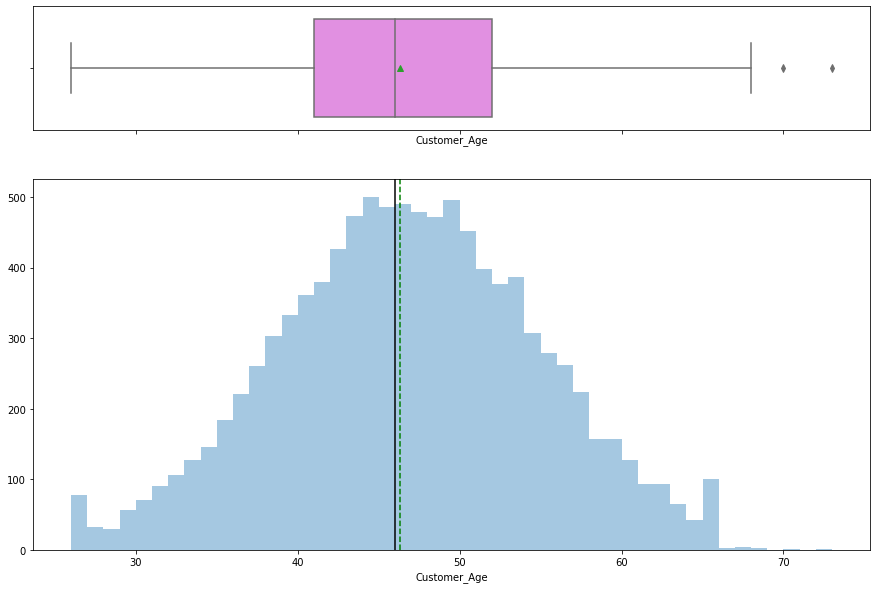

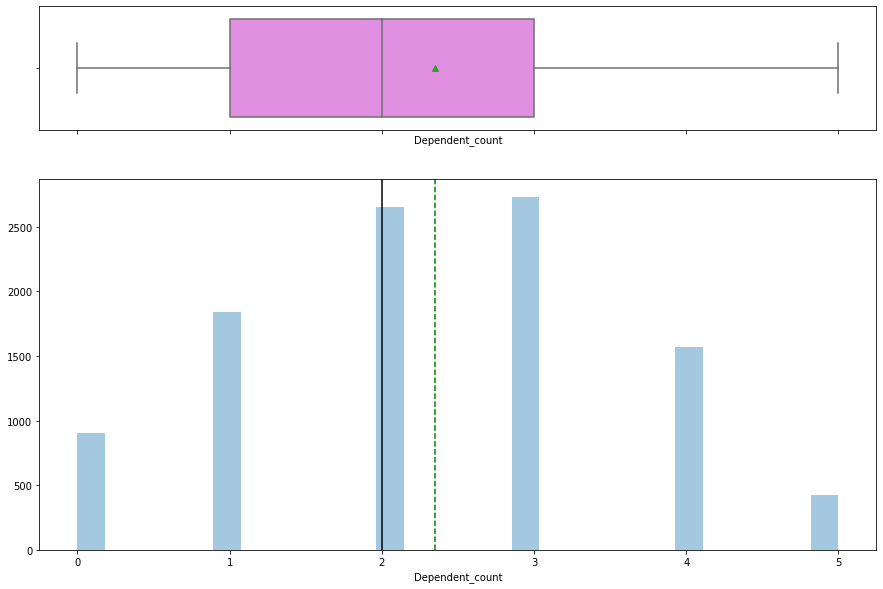

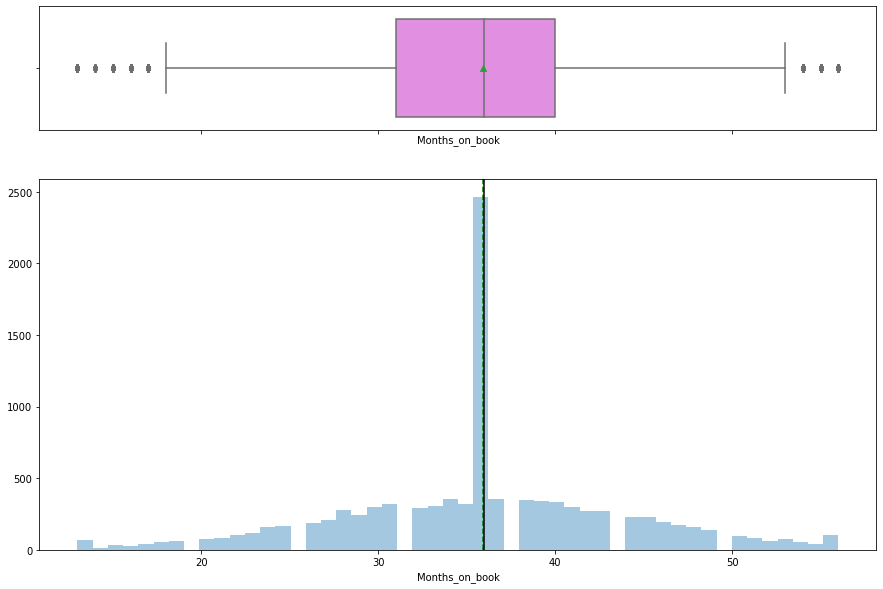

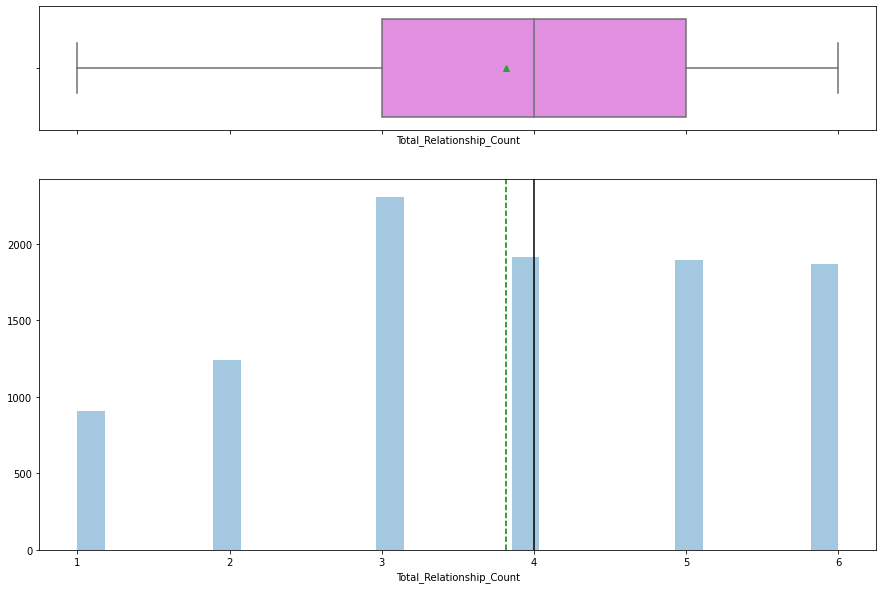

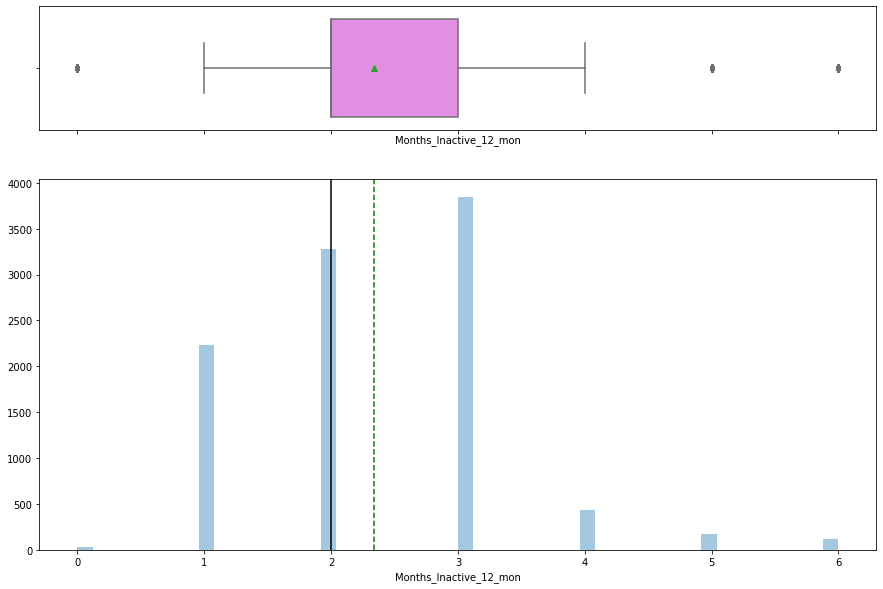

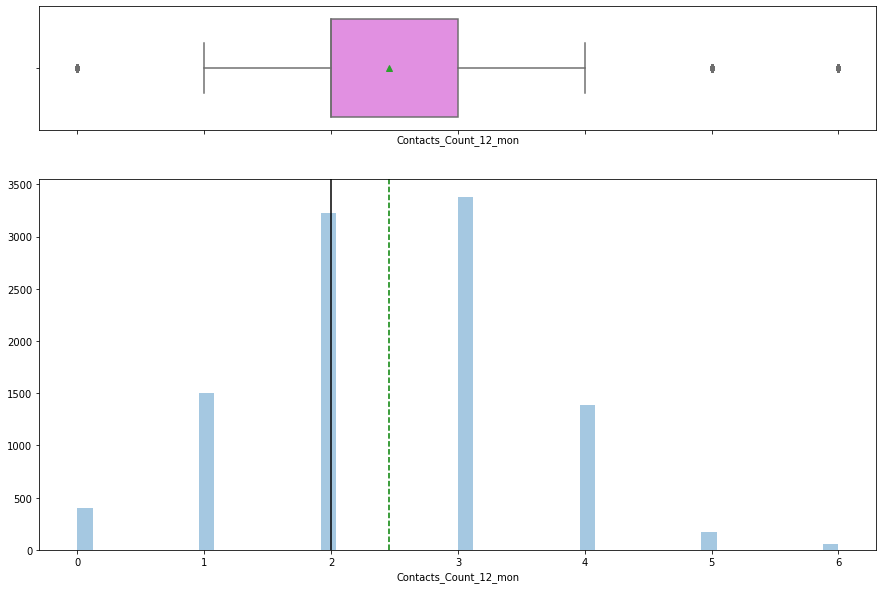

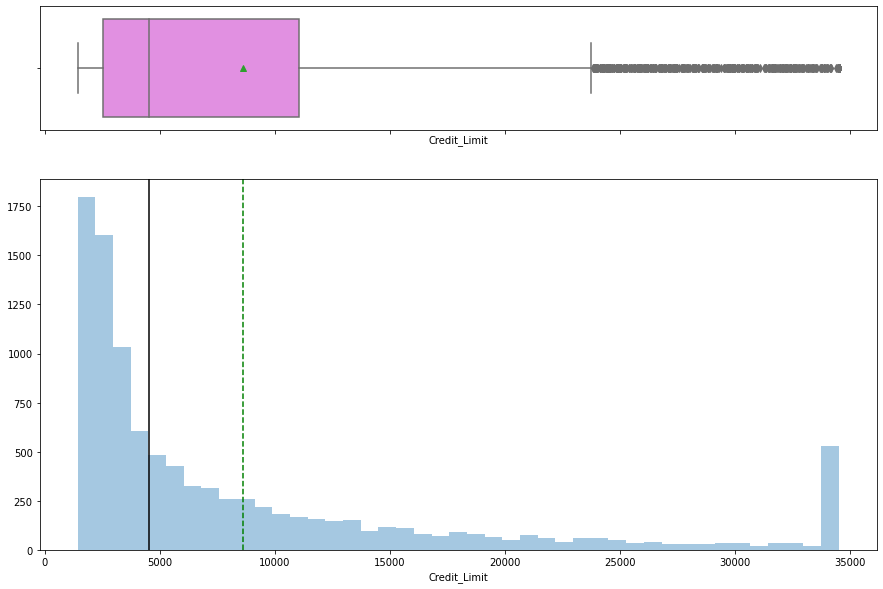

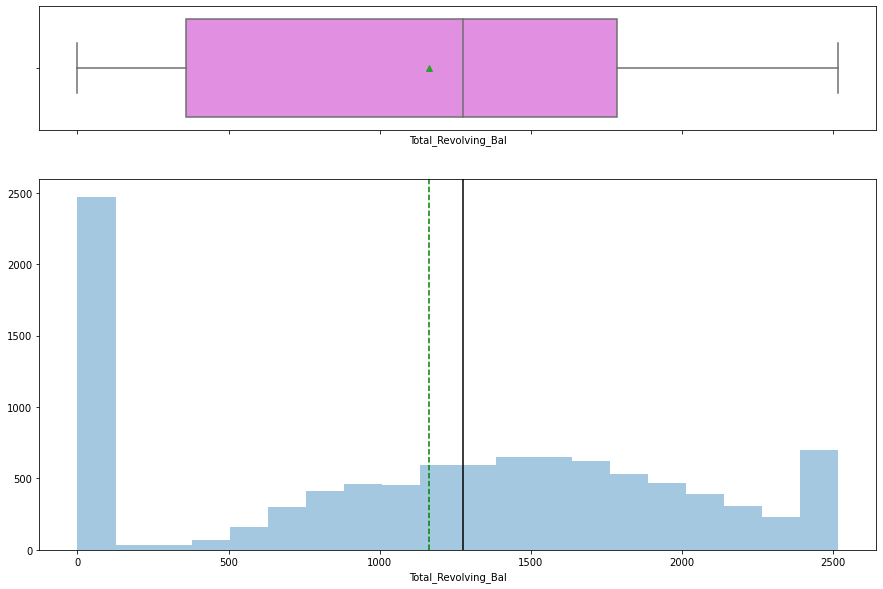

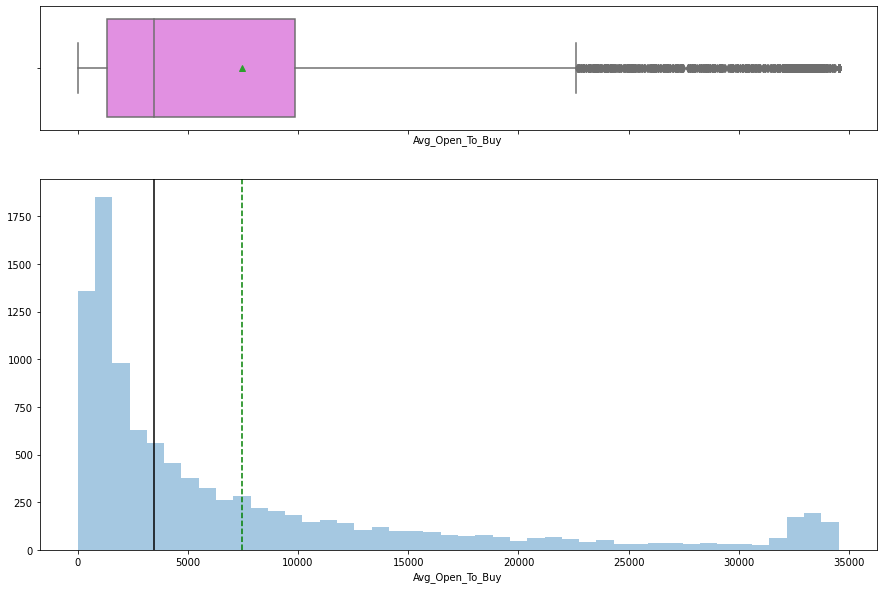

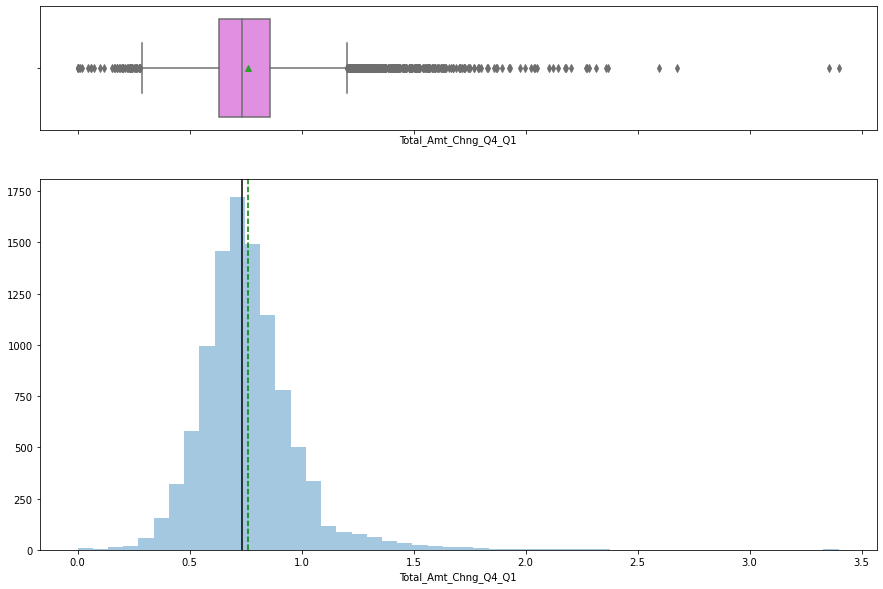

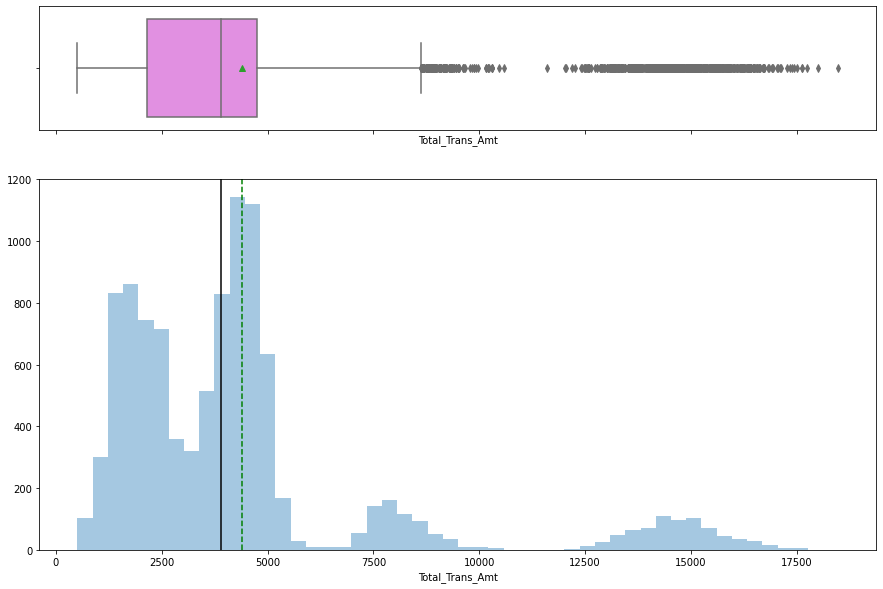

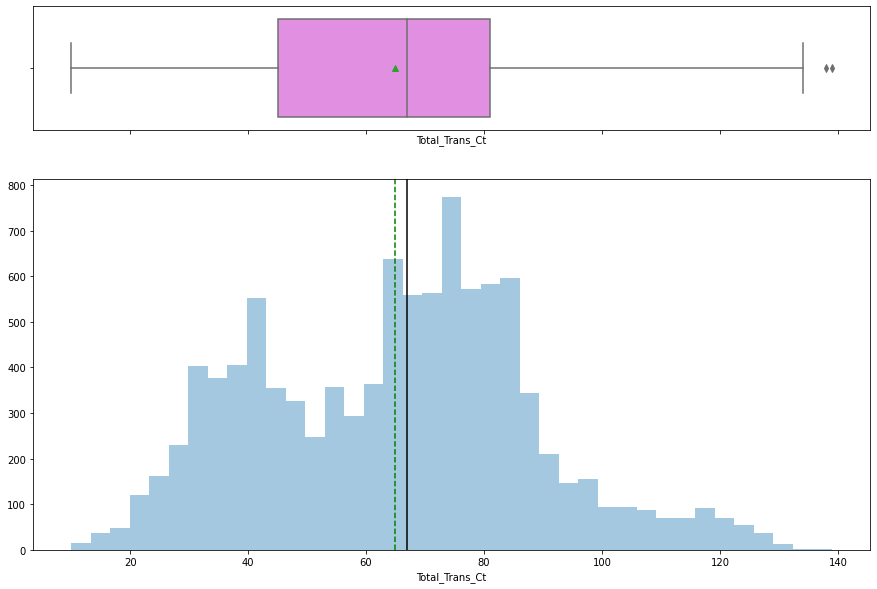

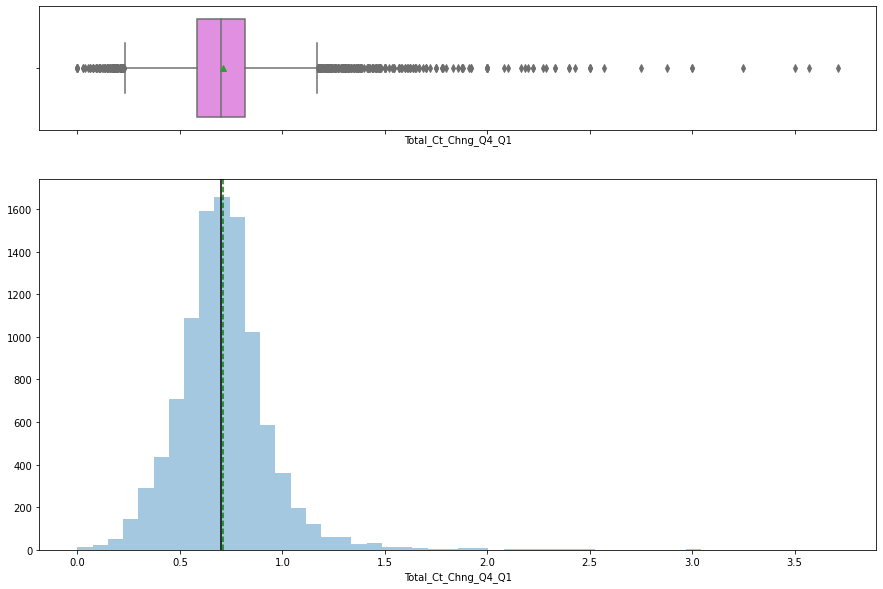

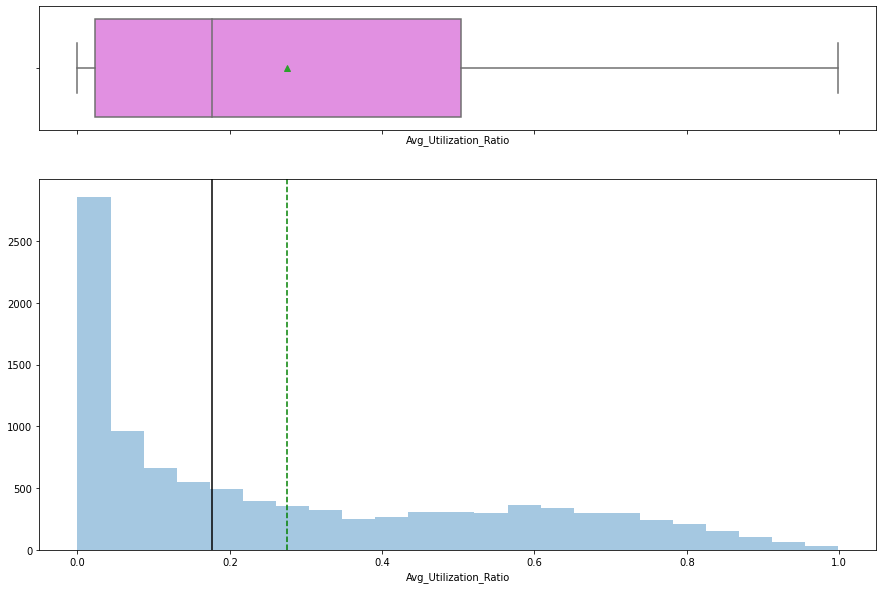

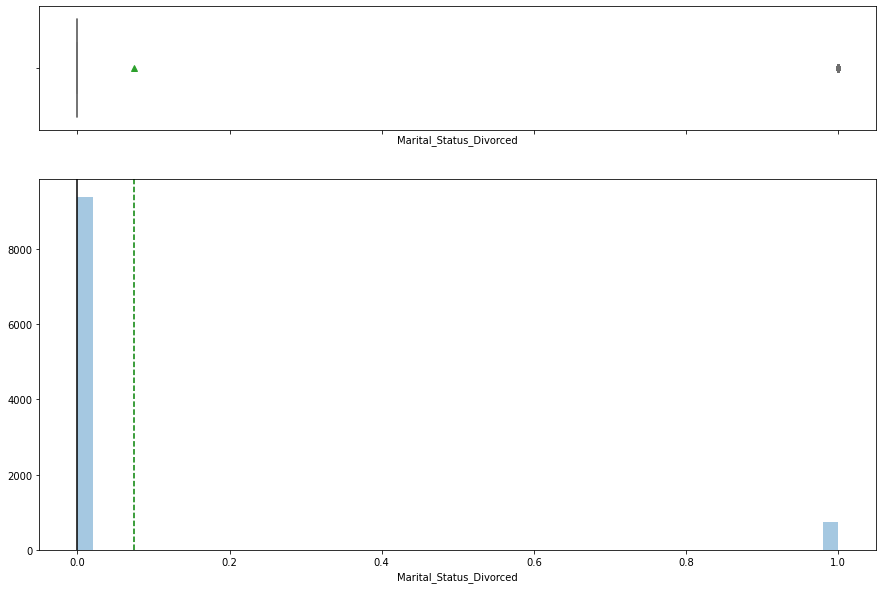

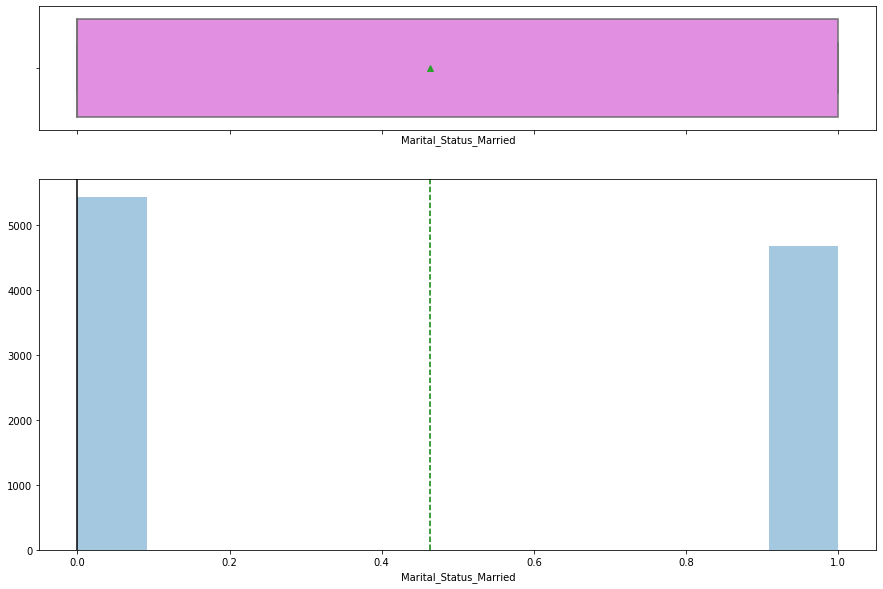

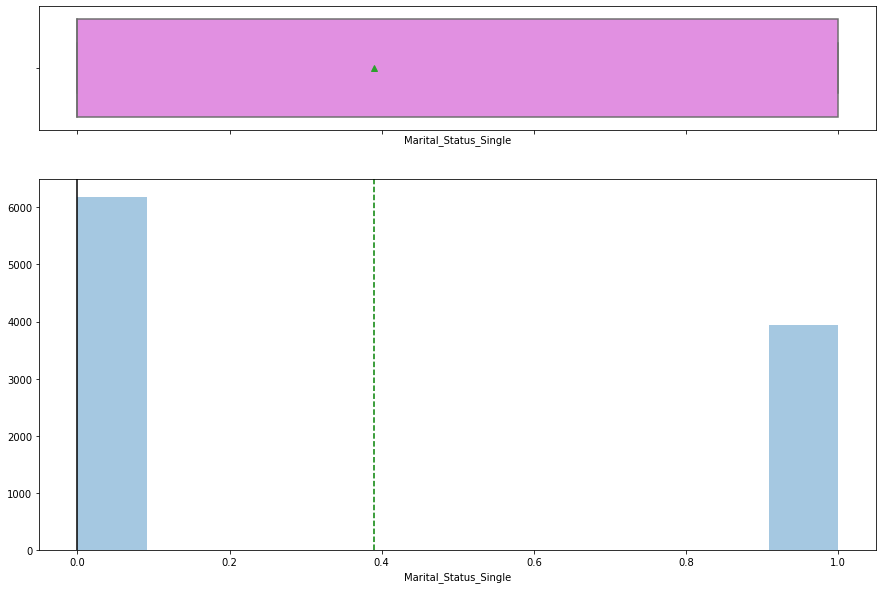

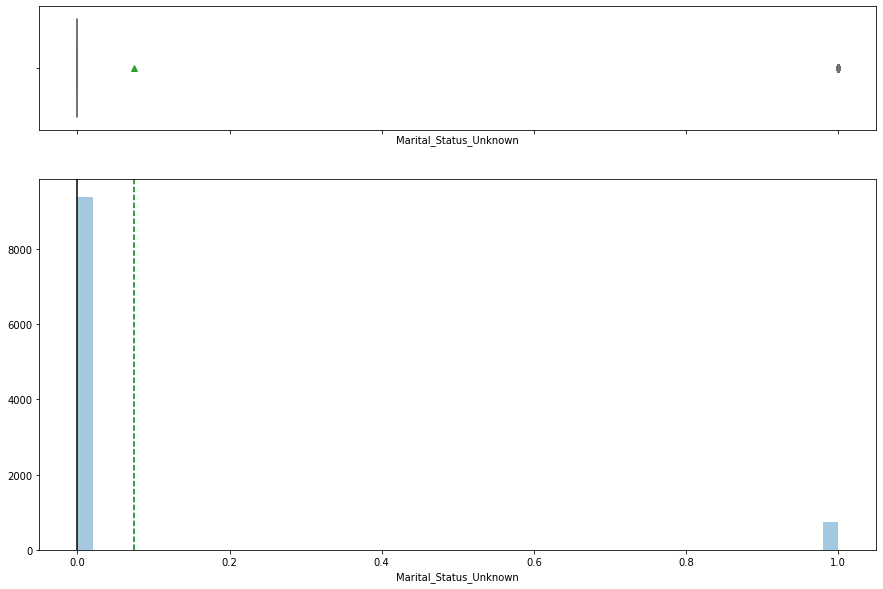

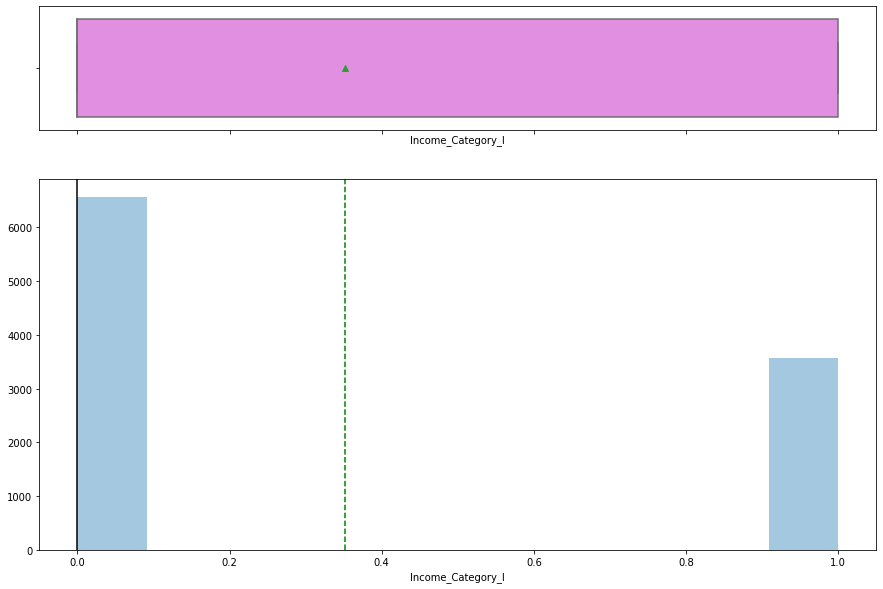

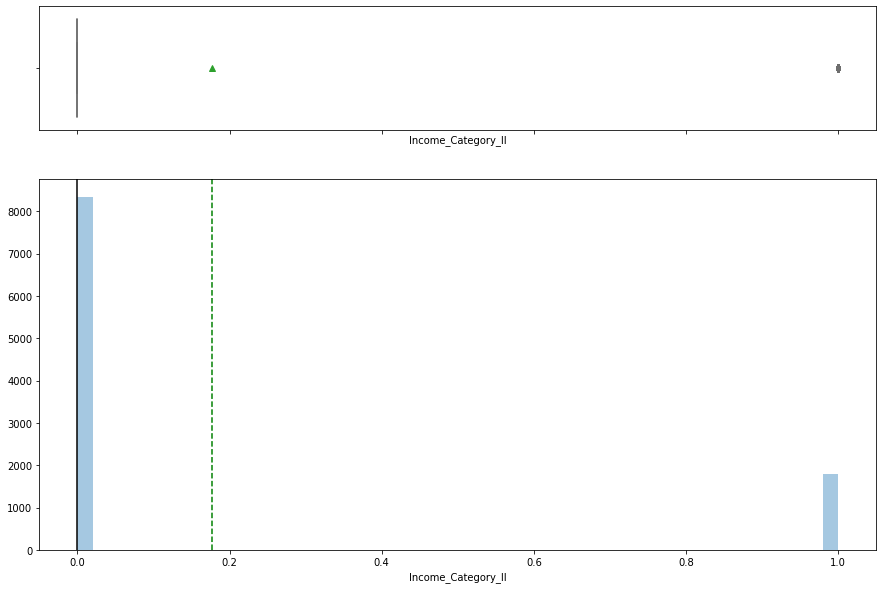

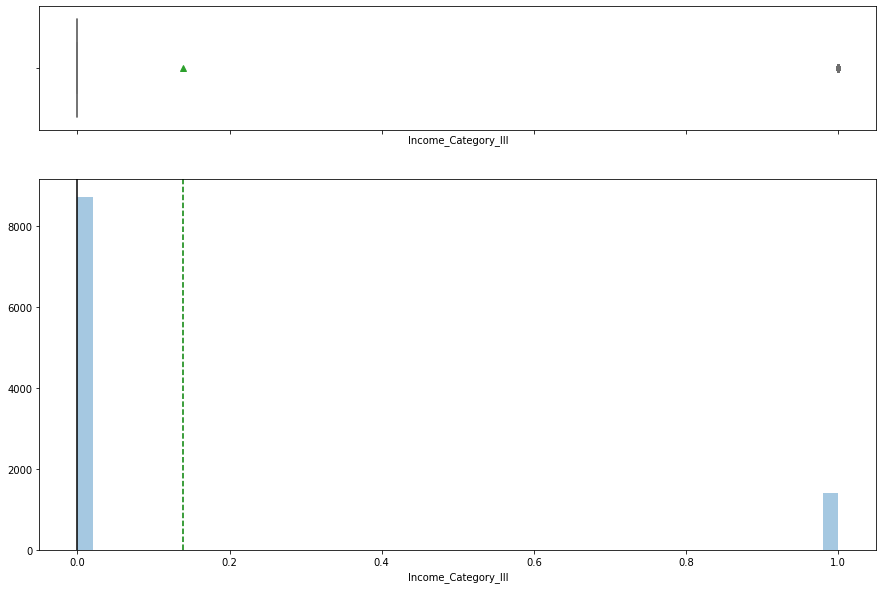

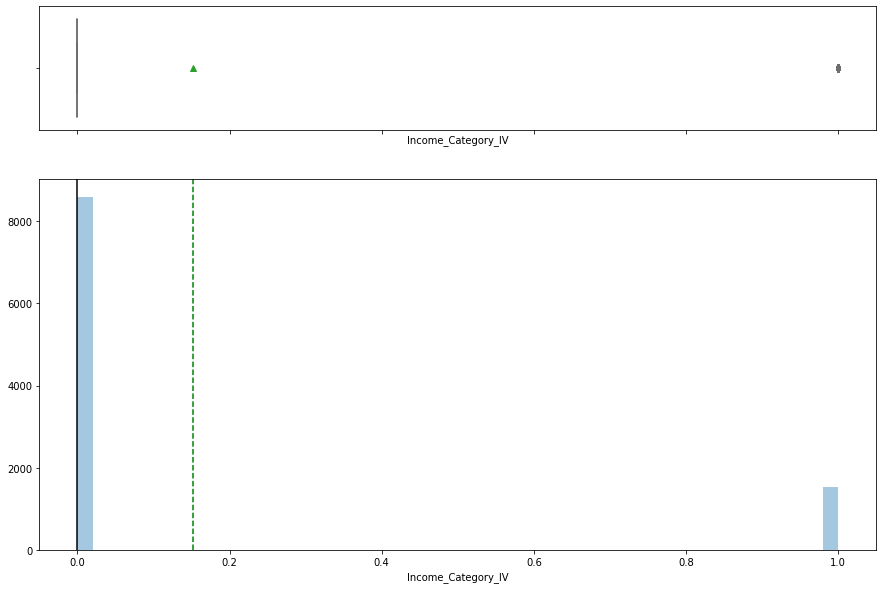

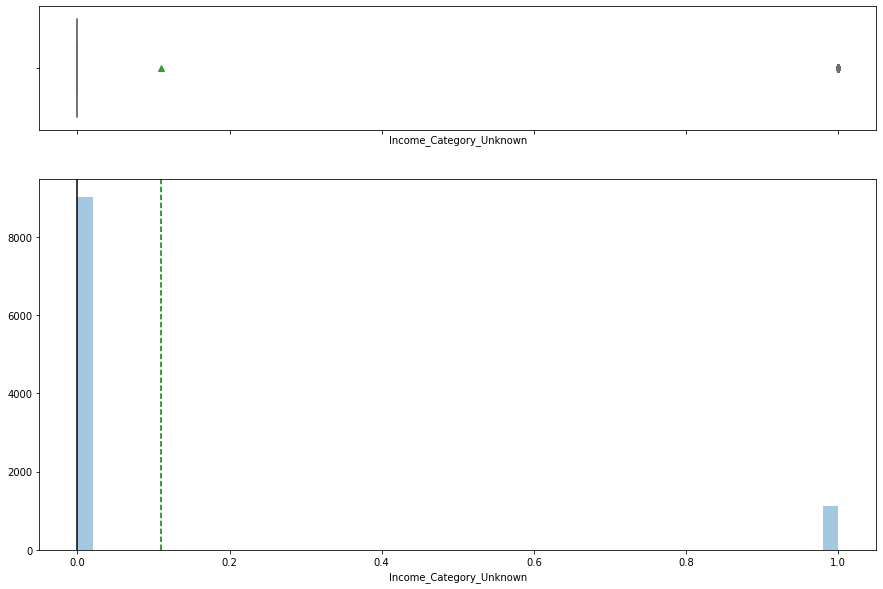

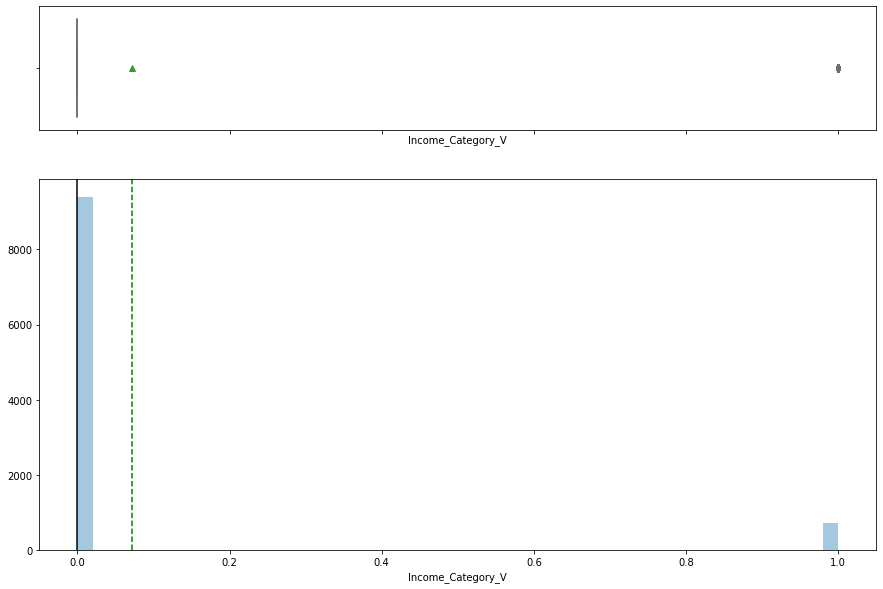

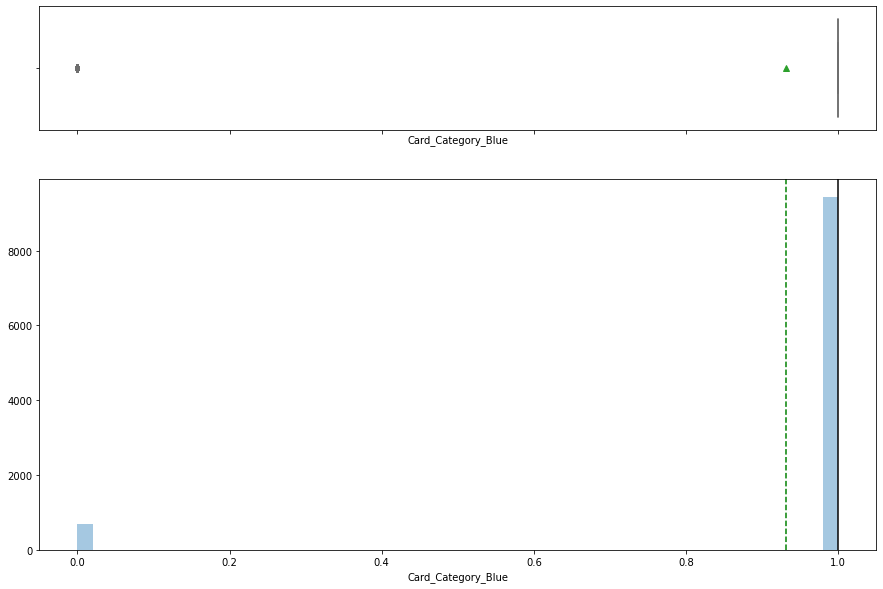

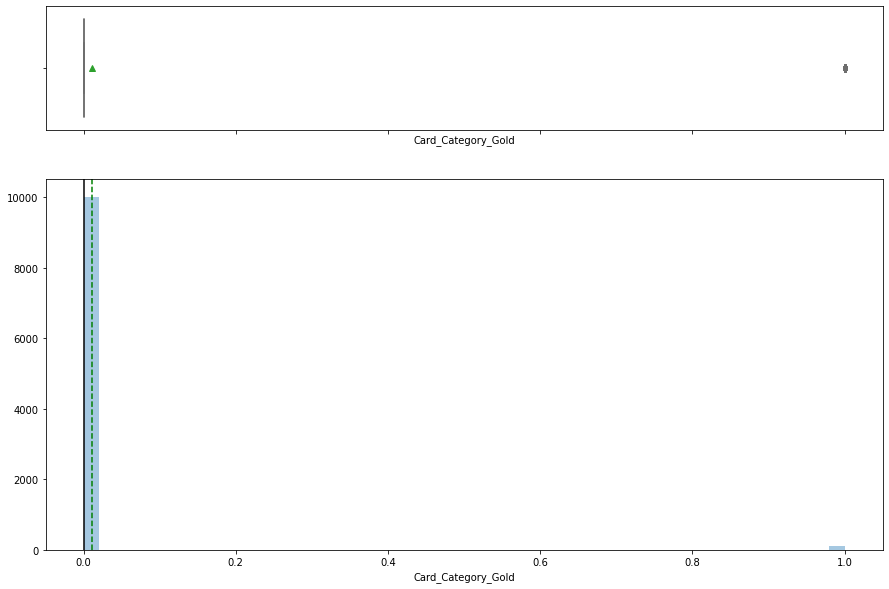

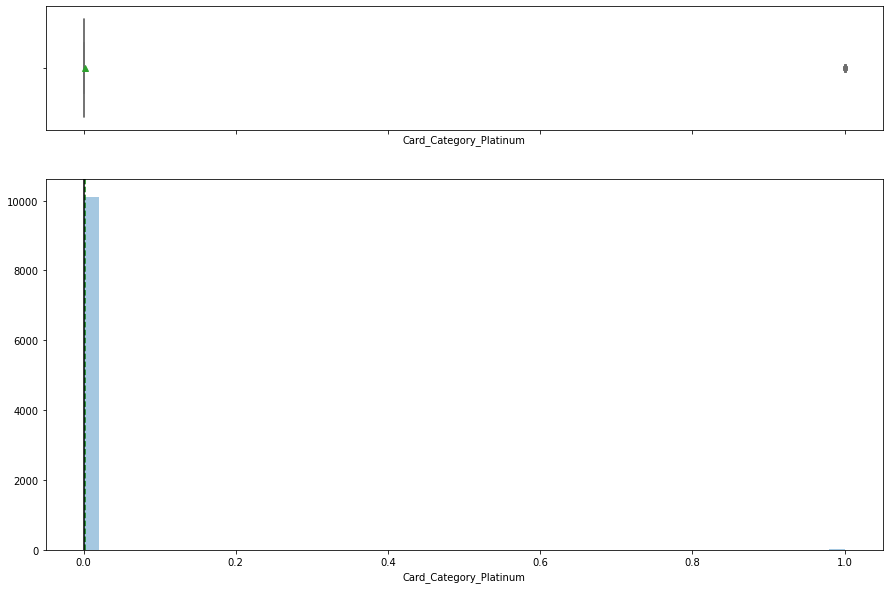

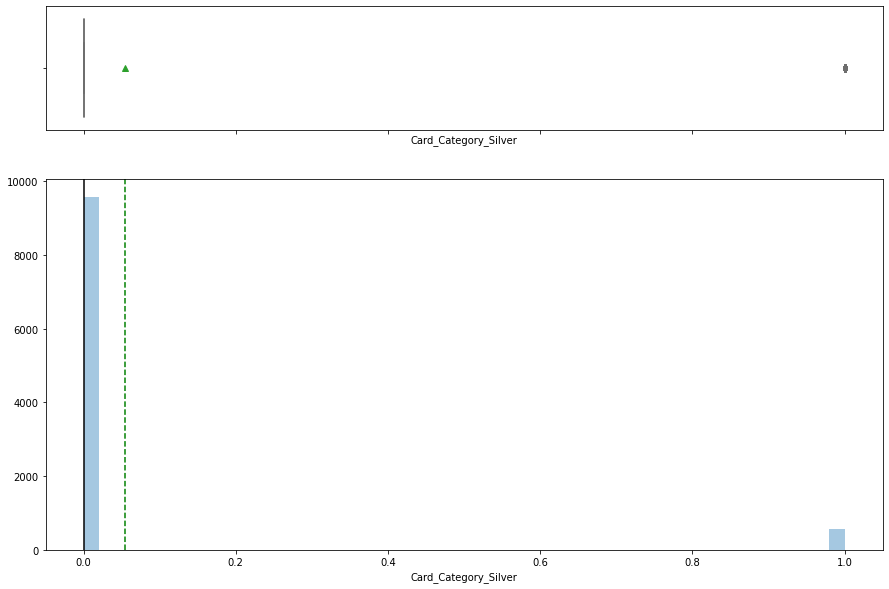

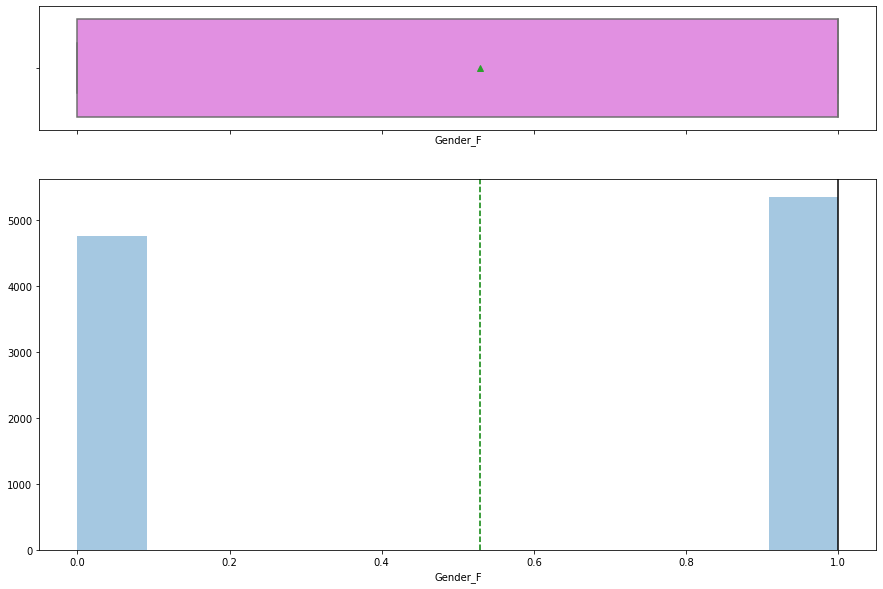

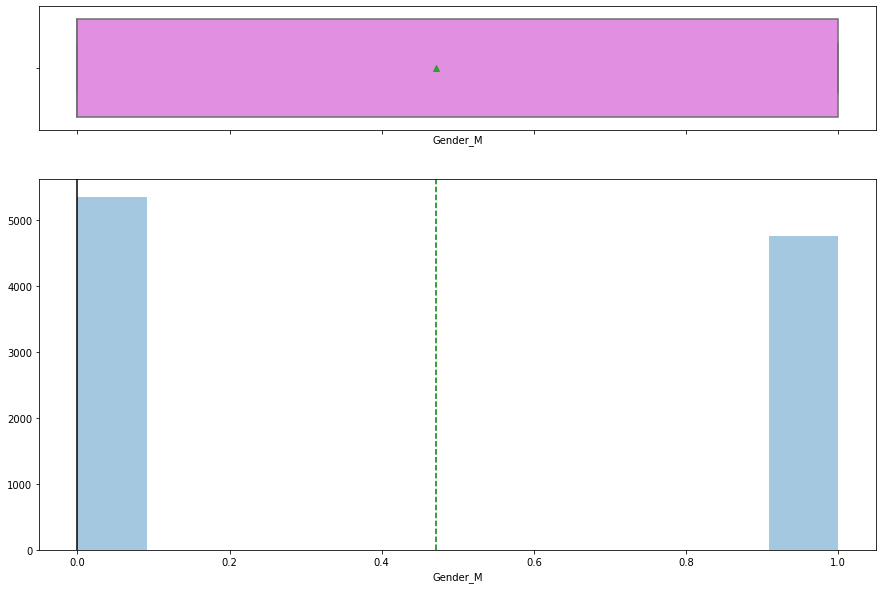

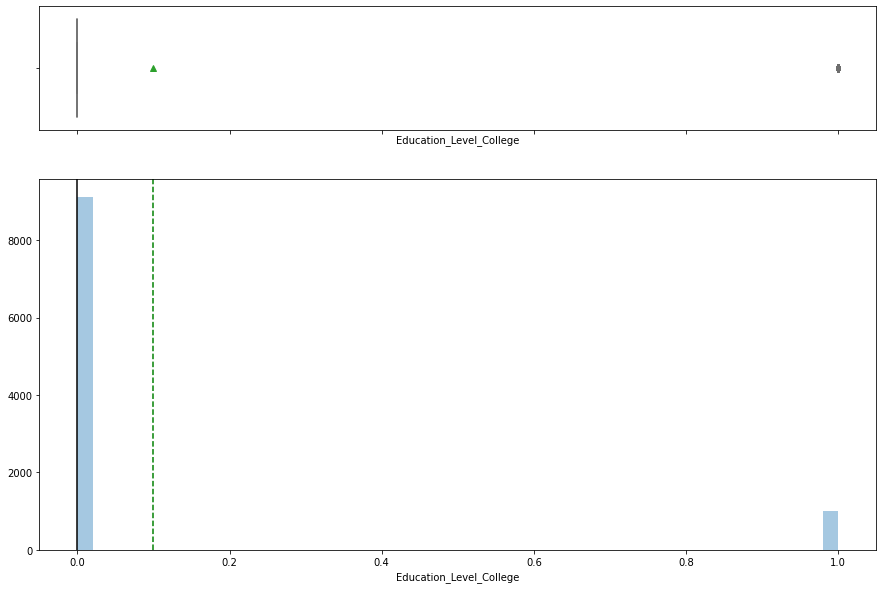

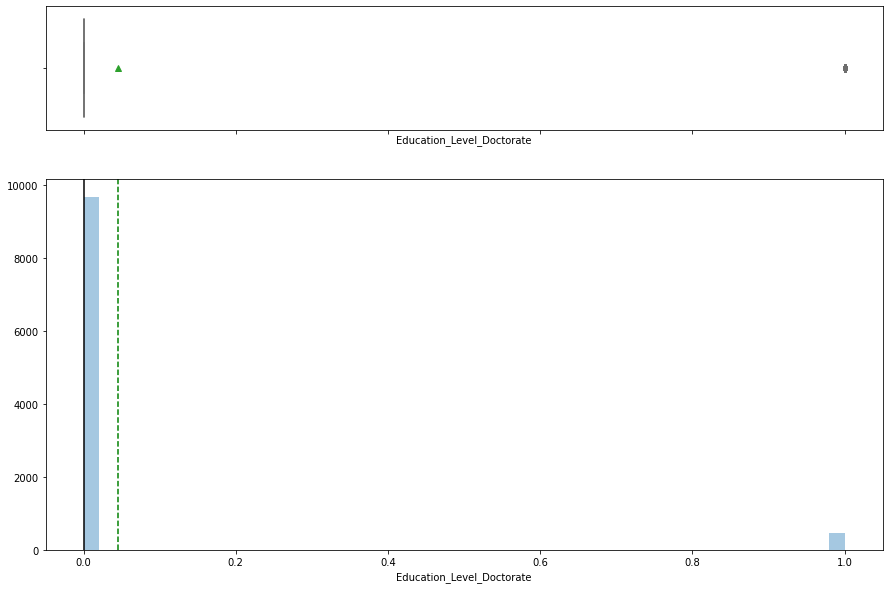

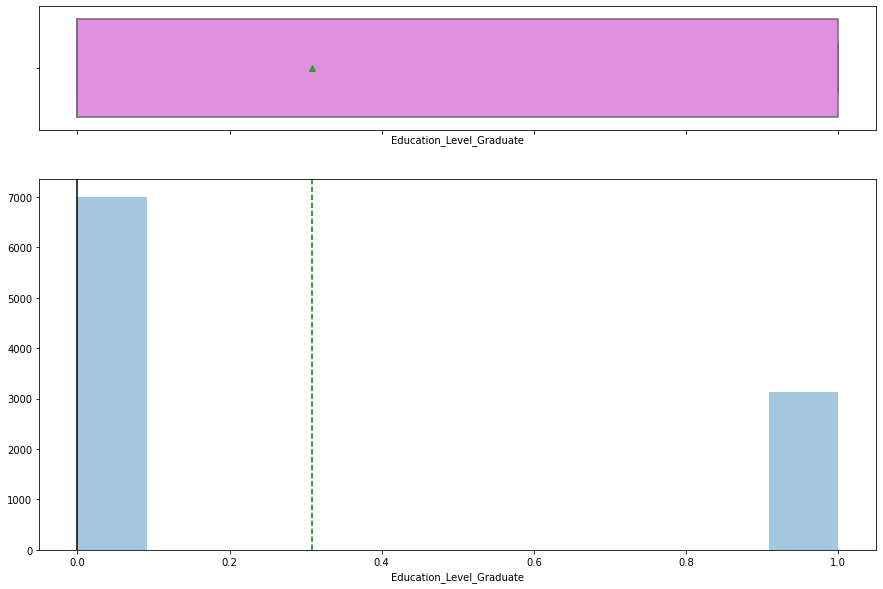

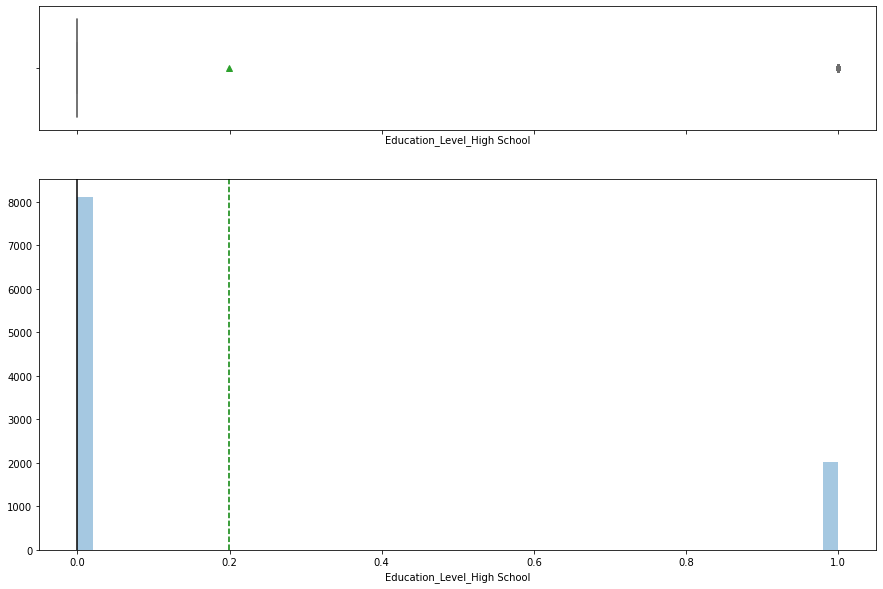

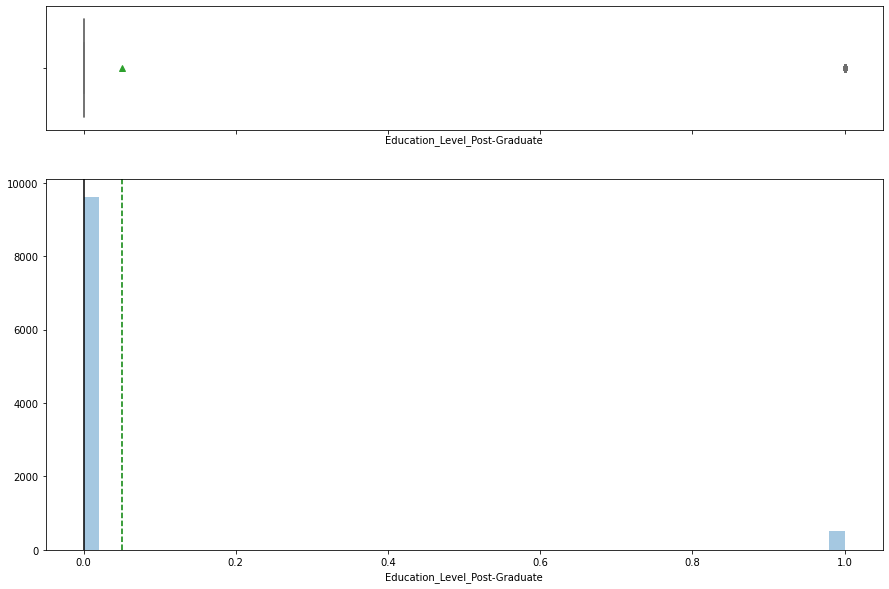

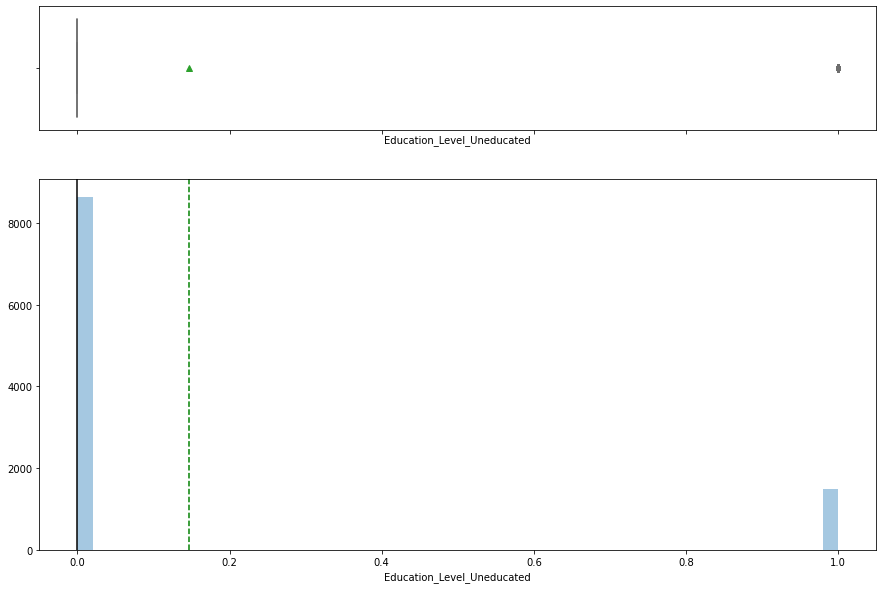

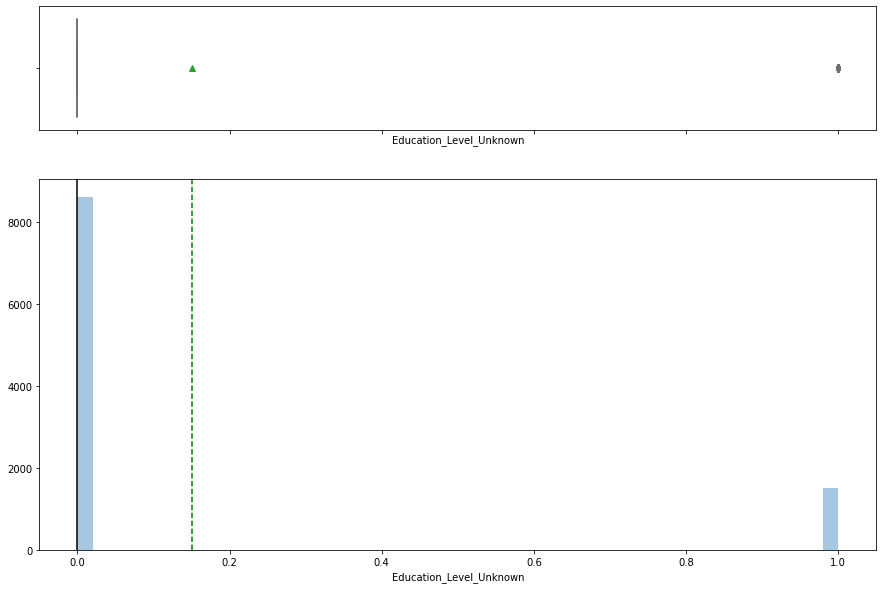

In [41]:
col = [ 'Customer_Age', 'Dependent_count',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Unknown', 'Income_Category_I',
       'Income_Category_II', 'Income_Category_III', 'Income_Category_IV',
       'Income_Category_Unknown', 'Income_Category_V', 'Card_Category_Blue',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Gender_F', 'Gender_M', 'Education_Level_College',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown']

for feature in col:
  histogram_boxplot(creditCardDF[feature])

**Insights**
1. Avg open to buy - skewed towards right.
2. Age, month on books looks normal symmetrical distribution.
3. Avg_utilization_ration skewed towards right

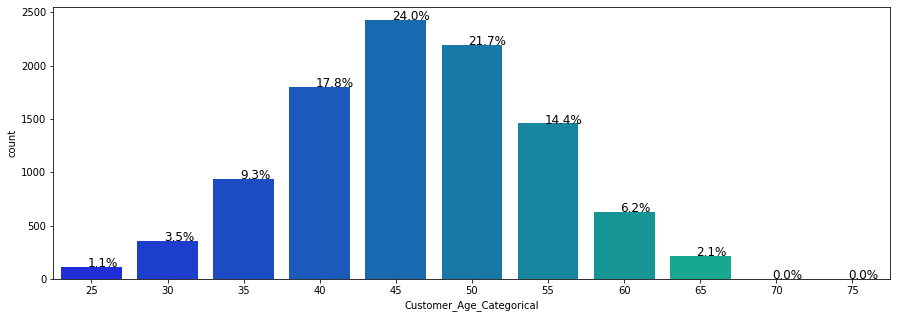

In [ ]:
# 'Customer_Age_Categorical', 'Credit_Limit_Categorical',
#        'Total_Revolving_Bal_Categorical', 'Avg_Open_To_Buy_Categorical',
#        'Total_Amt_Chng_Q4_Q1_Categorical', 'Total_Trans_Amt_Categorical',
#        'Total_Trans_Ct_Categorical', 'Total_Ct_Chng_Q4_Q1_Categorical',
#        'Avg_Utilization_Ratio_Categorical'
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Customer_Age_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Customer_Age_Categorical'])

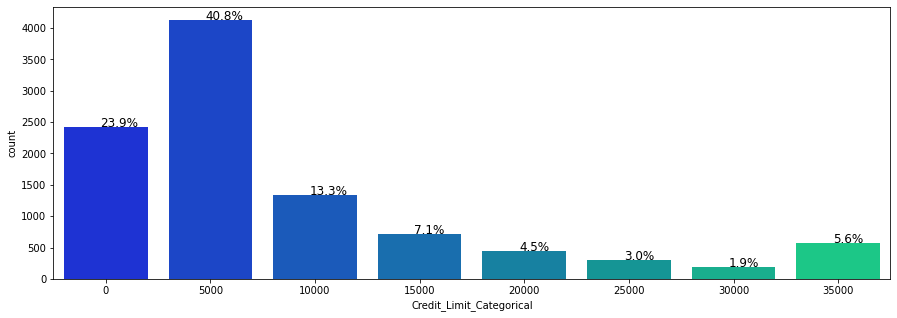

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Credit_Limit_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Credit_Limit_Categorical'])

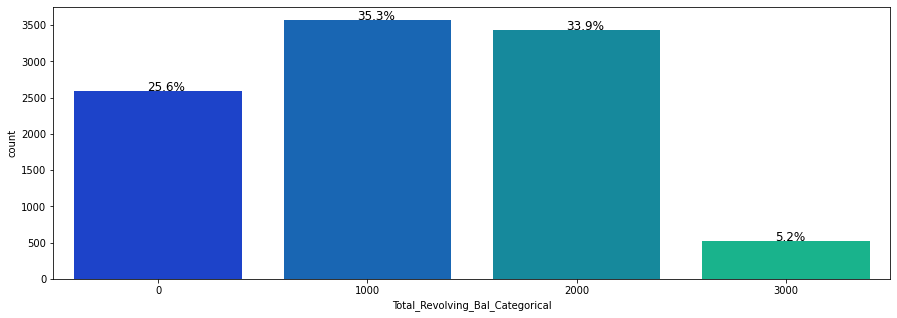

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Total_Revolving_Bal_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Total_Revolving_Bal_Categorical'])

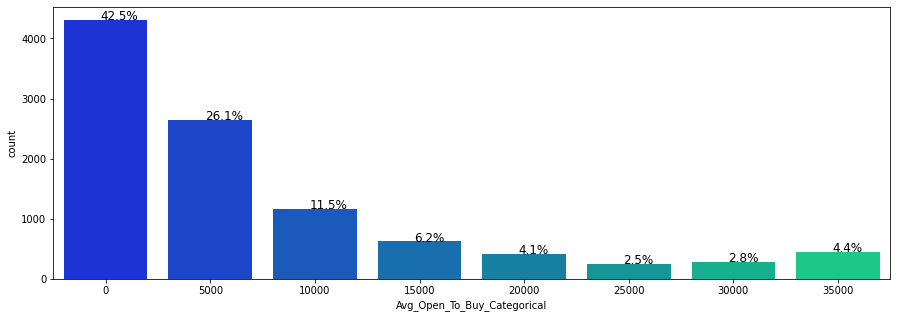

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Avg_Open_To_Buy_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Avg_Open_To_Buy_Categorical'])

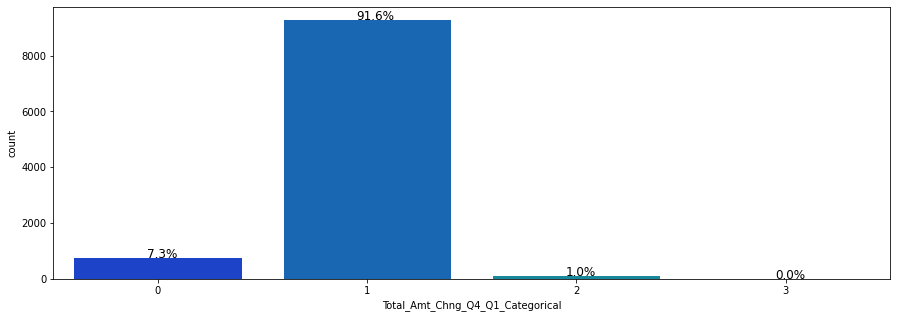

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Total_Amt_Chng_Q4_Q1_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Total_Amt_Chng_Q4_Q1_Categorical'])

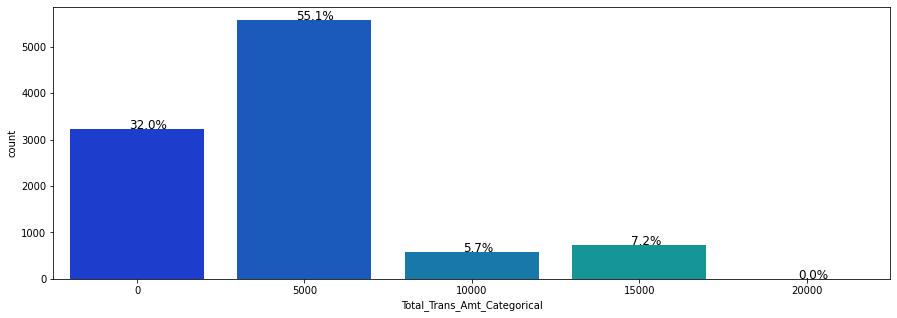

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Total_Trans_Amt_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Total_Trans_Amt_Categorical'])

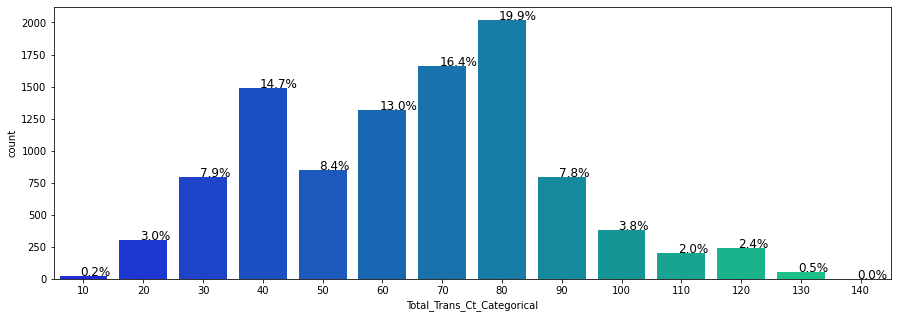

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Total_Trans_Ct_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Total_Trans_Ct_Categorical'])

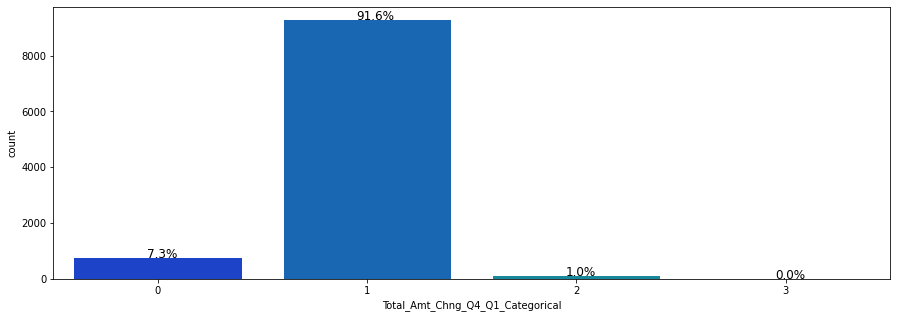

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Total_Amt_Chng_Q4_Q1_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Total_Amt_Chng_Q4_Q1_Categorical'])

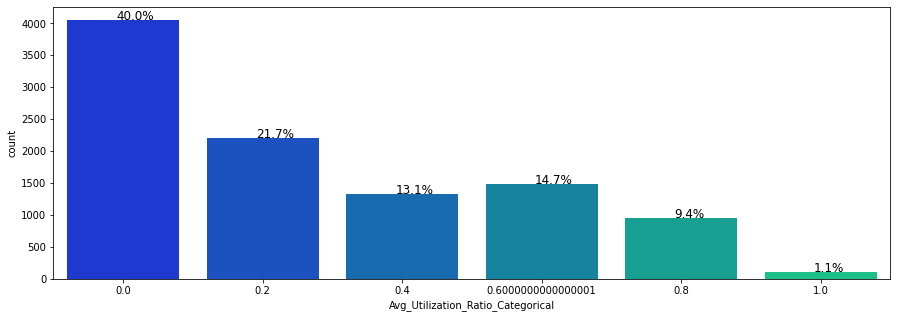

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(creditCardDF['Avg_Utilization_Ratio_Categorical'],palette='winter')
perc_on_bar(ax,creditCardDF['Avg_Utilization_Ratio_Categorical'])

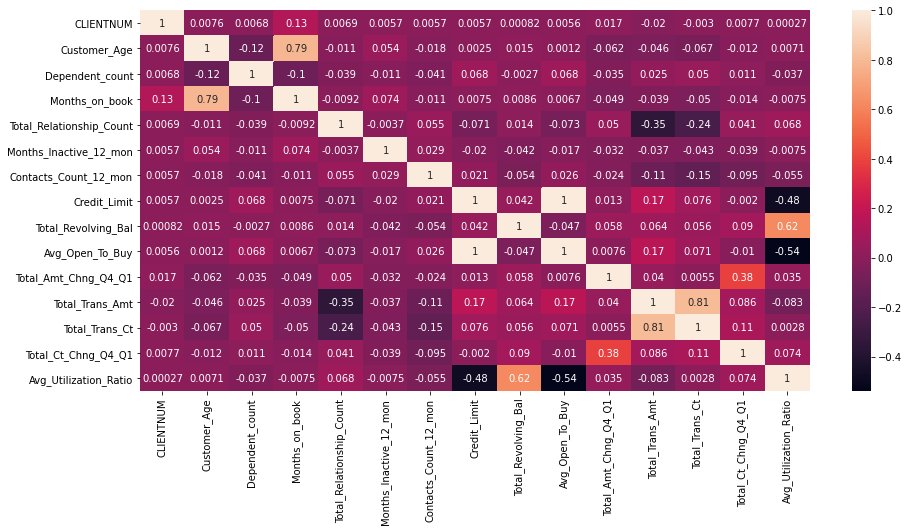

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(creditCardDF_before_encoding.corr(),annot=True)
plt.show()

In [ ]:
creditCardDF_before_encoding.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

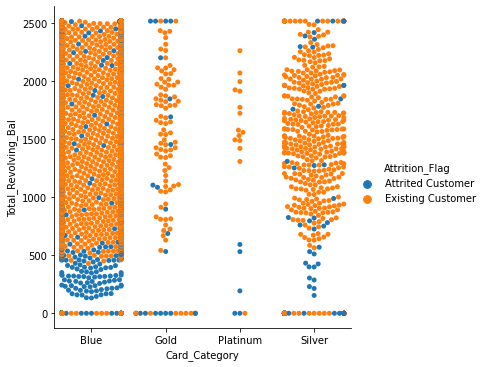

In [ ]:
if not save_exec_time: 
  sns.catplot(x="Card_Category", y="Total_Revolving_Bal", hue='Attrition_Flag', kind="swarm", data=creditCardDF_before_encoding)

**Insights**
1. Blue category is majority card type.
2. when revolving balance is less than 500, the attrition is more and for blue it constitute majority of attrition.

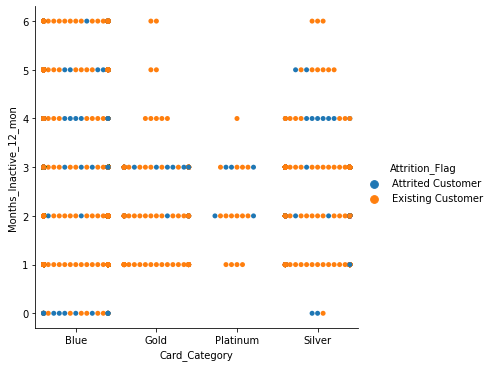

In [ ]:
if not save_exec_time: 
  sns.catplot(x="Card_Category", y="Months_Inactive_12_mon", hue='Attrition_Flag', kind="swarm", data=creditCardDF_before_encoding)

**Insights**
1. Not much observation

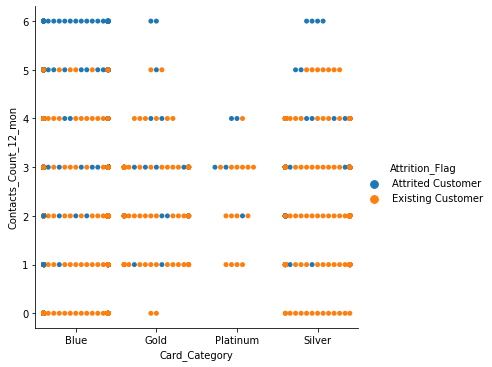

In [ ]:
if not save_exec_time: 
  sns.catplot(x="Card_Category", y="Contacts_Count_12_mon", hue='Attrition_Flag', kind="swarm", data=creditCardDF_before_encoding)

**Insights**
1. when contact count is more, the attrition is high across all card category. 

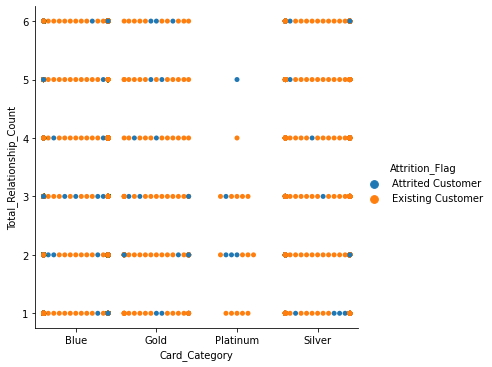

In [ ]:
sns.catplot(x="Card_Category", y="Total_Relationship_Count", hue='Attrition_Flag', kind="swarm", data=creditCardDF_before_encoding)

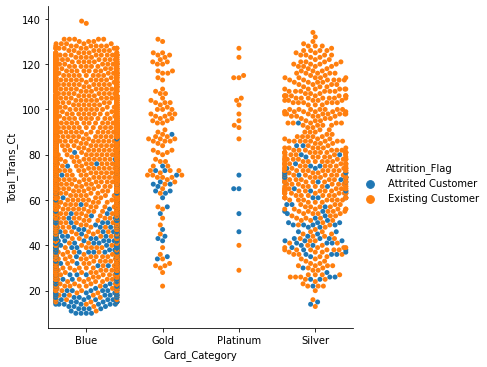

In [ ]:
sns.catplot(x="Card_Category", y='Total_Trans_Ct', hue='Attrition_Flag', kind="swarm", data=creditCardDF_before_encoding)

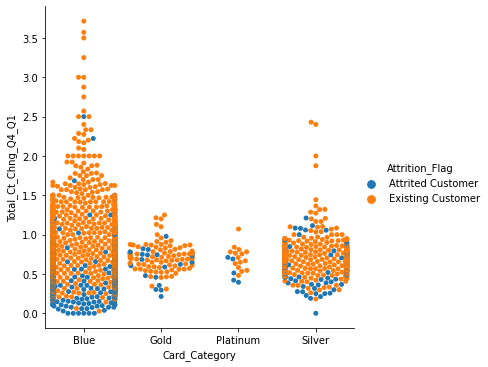

In [ ]:
sns.catplot(x="Card_Category", y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', kind="swarm", data=creditCardDF_before_encoding)

**Insights**
* When transaction count is less, the chances of attrition is more. 

<a id=‘dpp’><h2><strong><span style='color: rgb(97, 189, 109); font-family: "Times New Roman", Times, serif; font-size: 30px;'>Data preprocessing</span></strong></h2></a>

# **Data Preprocessing** 

* Converting target variable to continuos. 
* Dropping clientnum.
* Dropping Avg_open_to_buy - looks to be duplicate, as we have Revolving balance and credit limit. 
* Replacing unknown present in Martial_status, Education_level and Income category to np.NaN



In [114]:
creditCardDF_orig = creditCardDF_copy.copy()
creditCardDF_orig.drop(columns=['CLIENTNUM'],inplace=True)
creditCardDF_orig.drop(columns=['Avg_Open_To_Buy'],inplace=True)

creditCardDF_orig = pd.get_dummies(creditCardDF_orig,columns=['Gender'])

Attrition_Flag = {'Attrited Customer':0, 'Existing Customer':1}
creditCardDF_orig['Attrition_Flag'] = creditCardDF_orig['Attrition_Flag'].map(Attrition_Flag)

In [115]:
creditCardDF_orig.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Gender_F                      uint8
Gender_M                      uint8
dtype: object

In [116]:
creditCardDF_orig['Attrition_Flag']

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attrition_Flag, Length: 10127, dtype: int64

In [117]:
creditCardDF_orig['Marital_Status'].replace({'Unknown': np.NaN},inplace=True)

In [118]:
creditCardDF_orig['Education_Level'].replace({'Unknown': np.NaN},inplace=True)

In [119]:
creditCardDF_orig['Income_Category'].replace({'Unknown': np.NaN},inplace=True)

In [52]:
creditCardDF_orig.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Gender_F                       0
Gender_M                       0
dtype: int64

**Insights**
* Number of missing values for education_level and Income category is above 1000

In [121]:
# Converting to categorical value for below columns
creditCardDF_orig['Education_Level'] = pd.Categorical(creditCardDF_orig['Education_Level'])
creditCardDF_orig['Marital_Status'] = pd.Categorical(creditCardDF_orig['Marital_Status'])

creditCardDF_orig['Income_Category'] = pd.Categorical(creditCardDF_orig['Income_Category'])
creditCardDF_orig['Attrition_Flag'] = pd.Categorical(creditCardDF_orig['Attrition_Flag'])
creditCardDF_orig.dtypes

Attrition_Flag              category
Customer_Age                   int64
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category                 object
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
Gender_F                       uint8
Gender_M                       uint8
dtype: object

## **Split the data into train and test sets**

In [54]:
X = creditCardDF_orig.drop("Attrition_Flag",axis=1)
y = creditCardDF_orig.pop('Attrition_Flag')

**splitting into train, validation and test dataset**

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25,stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=25,stratify=y_train) 

In [135]:
for data in [X_train,X_val,X_test,y_train,y_val,y_test]:

  print('+'*30)
  print(data.shape)

++++++++++++++++++++++++++++++
(6075, 19)
++++++++++++++++++++++++++++++
(2026, 19)
++++++++++++++++++++++++++++++
(2026, 19)
++++++++++++++++++++++++++++++
(6075,)
++++++++++++++++++++++++++++++
(2026,)
++++++++++++++++++++++++++++++
(2026,)


**Missing-Value Treatment**
1. We will use KNN imputer to impute missing values.







In [136]:
imputer = KNNImputer(missing_values=np.NaN,n_neighbors=3)
X_train.columns

Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M'],
      dtype='object')

**Converting categorical variable to continuous for imputing**

In [137]:
Marital_Status = {'Married':1, 'Single':0, 'Divorced':2}
Education_Level = {'High School':1, 'Graduate':3, 'Uneducated':0, 'College':2,
       'Post-Graduate':4, 'Doctorate':5}
Income_Category = {'$60K - $80K':3, 'Less than $40K':1, '$80K - $120K':4, '$40K - $60K':2, '$120K +':5}
Card_Category = {'Blue':1,'Silver':'2','Gold':3,'Platinum':4}



In [138]:
for data in [X_train,X_val,X_test]:
  data['Marital_Status'] = data['Marital_Status'].map(Marital_Status)
  data['Education_Level'] = data['Education_Level'].map(Education_Level)
  data['Income_Category'] = data['Income_Category'].map(Income_Category)
  data['Card_Category'] = data['Card_Category'].map(Card_Category)




In [139]:
X_train[['Marital_Status','Education_Level','Income_Category']].head()

,Marital_Status,Education_Level,Income_Category
5092,1,NaN,5
864,1,1,3
2888,NaN,3,4
1025,1,3,4
628,1,3,NaN


In [140]:
#Checking that no of column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                  0
Dependent_count               0
Education_Level             922
Marital_Status              443
Income_Category             642
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                  0
Total_Revolving_Bal           0
Total_Amt_Chng_Q4_Q1          0
Total_Trans_Amt               0
Total_Trans_Ct                0
Total_Ct_Chng_Q4_Q1           0
Avg_Utilization_Ratio         0
Gender_F                      0
Gender_M                      0
dtype: int64
------------------------------
Customer_Age                  0
Dependent_count               0
Education_Level             305
Marital_Status              164
Income_Category             250
Card_Category                 0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                

In [141]:
#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)
#Transform the val data 
X_val=pd.DataFrame(imputer.transform(X_val),columns=X_val.columns)
#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [142]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Gender_F                    0
Gender_M                    0
dtype: int64
------------------------------
Customer_Age                0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1      

**insights**
1. used KNN imputer to impute the missing value for all categories

In [143]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_val[y] = np.round(X_val[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

Preserving the continuous variable for education_level, income_category. And only reversing for Martial Status. After reversing will do one hot encoding for martial status

In [144]:
# 'Marital_Status','Education_Level','Income_Category'
inverse_mapping(Marital_Status,'Marital_Status')
# inverse_mapping(Education_Level,'Education_Level')
# inverse_mapping(Income_Category,'Income_Category')

In [145]:
X_train = pd.get_dummies(X_train,columns=['Marital_Status'])
X_val = pd.get_dummies(X_val,columns=['Marital_Status'])
X_test = pd.get_dummies(X_test,columns=['Marital_Status'])

In [146]:
print(X_train.columns)
print(X_train.shape)
print(X_train.dtypes)

Index(['Customer_Age', 'Dependent_count', 'Education_Level', 'Income_Category',
       'Card_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Gender_F', 'Gender_M', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single'],
      dtype='object')
(6075, 21)
Customer_Age                float64
Dependent_count             float64
Education_Level             float64
Income_Category             float64
Card_Category               float64
Months_on_book              float64
Total_Relationship_Count    float64
Months_Inactive_12_mon      float64
Contacts_Count_12_mon       float64
Credit_Limit                float64
Total_Revolving_Bal         float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will move away and the customer doesn't moveaway - Not a loss
2. Predicting a customer will continue credit card and the customer moves out - Loss of bank

#### Which case is more important? 
* Predicting that customer will not attrition but he attrite i.e. losing on a potential source of income for the bank because that customer will not targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

**Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV**

- `Stratified K-Folds cross-validator` provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

<a id = mmp>Multi Model Pipeline</a>

In [147]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss')),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 96.6856010313841
RF: 98.68602436067656
GBM: 98.64694337008602
ADB: 97.86249494891186
XGB: 98.7645519444284
DTREE: 96.29348265312012


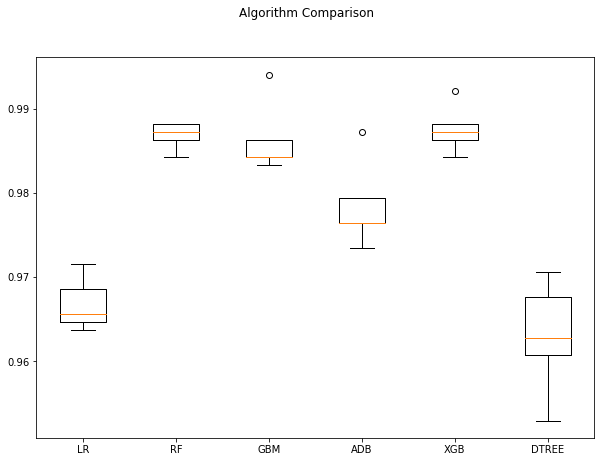

In [148]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

<a id = immp> insights of Multi model Pipeline </a>

**Insights**
* After running pipeline and from output we got recall score for all the model.
* out of all model, XGB and RF are top two model. Hence I am selecting those for further evaluation. 

## **Confusion Matrix and get metrics Defintion**
* Added code to handle validation data to give sense of performation in production environment

In [150]:
# Function to create confusion matrix
# Adding X_test as argument so it can handle X_test and X_val
def make_confusion_matrix(model,y_actual,X_test,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [151]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    pred_test = model.predict(X_test)
    
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    val_acc = model.score(X_val,y_val)
    
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    val_recall = metrics.recall_score(y_val,pred_val)
    
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    val_precision = metrics.precision_score(y_val,pred_val)
    
    score_list.extend((train_acc,val_acc,test_acc,train_recall,val_recall,test_recall,train_precision,val_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on validation set : ",model.score(X_val,y_val))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on validation set : ",metrics.recall_score(y_val,pred_val))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on validation set : ",metrics.precision_score(y_val,pred_val))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
    
    return score_list # returning the list with train and test scores

In [152]:
no_grid_search

True

<a id = mbadacv>**Model1- Random Forest with Gridsearch CV**</a>

In [153]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "randomforestclassifier__n_estimators": np.arange(150, 250, 50),
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1),
    "randomforestclassifier__max_samples": np.arange(0.3, 0.7, 0.1)
    

}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


if no_grid_search:
  grid_cv =     RandomForestClassifier(
        max_features = 0.2,
        n_estimators=150,
        random_state=1,
        max_samples = 0.4,
        min_samples_leaf = 5,
    )
else:
  # Calling GridSearchCV
  grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)
  print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

  # Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)



# Best Parameters:{'randomforestclassifier__max_features': 0.2, 'randomforestclassifier__max_samples': 0.4, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__n_estimators': 150} 
# Score: 0.9884292559025573
# CPU times: user 13.6 s, sys: 1.08 s, total: 14.7 s
# Wall time: 14min 18s

CPU times: user 821 ms, sys: 6.21 ms, total: 827 ms
Wall time: 830 ms


In [155]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        max_features = 0.2,
        n_estimators=150,
        random_state=1,
        max_samples = 0.4,
        min_samples_leaf = 5,
    ),
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features=0.2,
                                        max_leaf_nodes=None, max_samples=0.4,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=5, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=None,
                                        oob_score=False, random_state=1,
                                        verbose=0, warm_start=False))],
         verbose=False)

Accuracy on training set :  0.9623045267489712
Accuracy on validation set :  0.937314906219151
Accuracy on test set :  0.9422507403751234
Recall on training set :  0.9947048440870759
Recall on validation set :  0.9894117647058823
Recall on test set :  0.9882422104644327
Precision on training set :  0.9616989002654531
Precision on validation set :  0.9391401451702959
Precision on test set :  0.9454443194600675


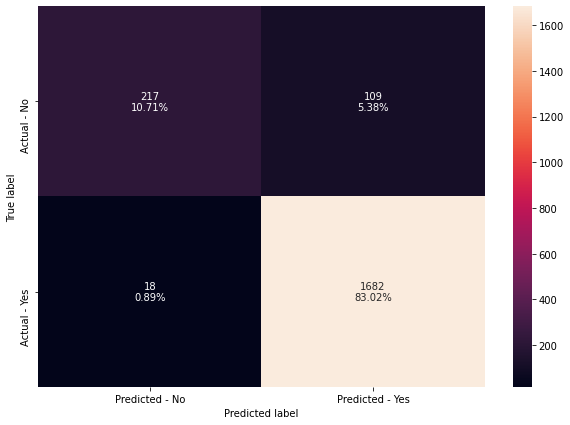

In [156]:
# Calculating different metrics
get_metrics_score(rf_tuned1)

make_confusion_matrix(rf_tuned1, y_val,X_val)


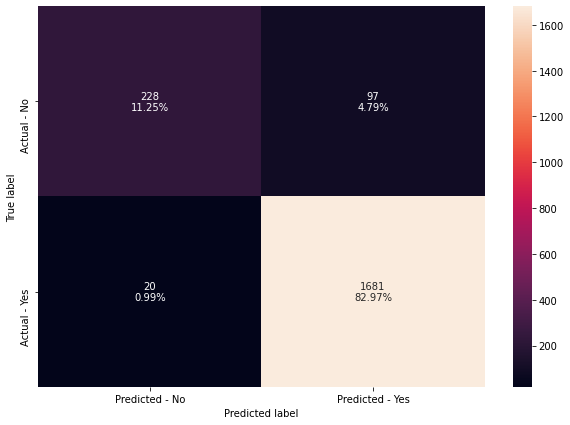

In [157]:
# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test,X_test)

<a id = imbadacv>**Model1- Random Forest with Gridsearch CV**</a>

**Observation - Random Forest -Grid Search CV**
* Recall for validation and test data 98%
* Accuracy and precision looks to worked evenly across all train, validation and test dataset

<a id = mbadars> **Model2- Random Forest with Random Search CV**</a>

In [164]:
%%time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
        "randomforestclassifier__n_estimators": np.arange(150, 250, 50),
    "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
    "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1),
    "randomforestclassifier__max_samples": np.arange(0.3, 0.7, 0.1)
    
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)


  #Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1,n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))



Best parameters are {'randomforestclassifier__n_estimators': 200, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__max_samples': 0.4, 'randomforestclassifier__max_features': 0.2} with CV score=0.9872525928919164:
CPU times: user 4.3 s, sys: 277 ms, total: 4.58 s
Wall time: 3min 28s


Accuracy on training set :  0.994508727201412
Accuracy on validation set :  0.9894117647058823
Accuracy on test set :  0.9888300999412111
Recall on training set :  0.994508727201412
Recall on validation set :  0.9894117647058823
Recall on test set :  0.9888300999412111
Precision on training set :  0.962056535761715
Precision on validation set :  0.9386160714285714
Precision on test set :  0.9444132509825941


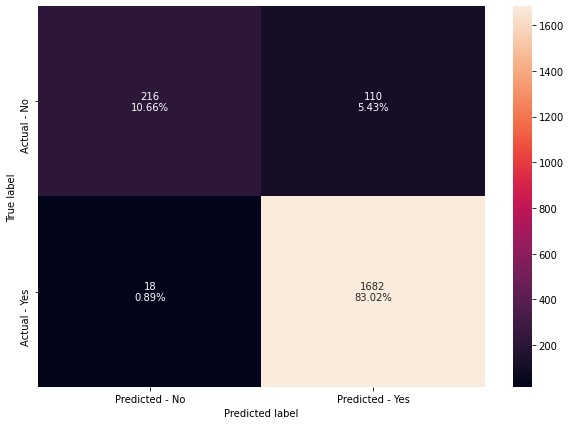

In [165]:
# Calculating different metrics
get_metrics_score(rf_tuned2)

make_confusion_matrix(rf_tuned2, y_val,X_val)

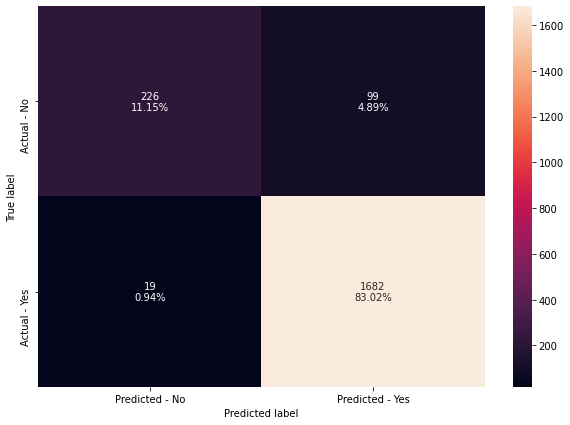

In [166]:
# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test,X_test)

**Observation of Random Forest - Random search**
1. Recall looks to be over fit for train around99%
2. For validation and test data - Recall is 98% 

**Model 3 -XGB combined Random Search with Grid search CV**
* Running Random search
* Feeding result to Grid Search for better performance

In [171]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss', n_estimators = 50))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),
            'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
            'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1],
           'xgbclassifier__max_depth':np.arange(1,10,1),
            'xgbclassifier__reg_lambda':[0,1,2,5,10]}





# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1,n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))
# Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 2, 'xgbclassifier__reg_lambda': 1, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 3} with CV score=1.0:
# CPU times: user 3.43 s, sys: 289 ms, total: 3.72 s
# Wall time: 3min 4s

Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 2, 'xgbclassifier__reg_lambda': 1, 'xgbclassifier__n_estimators': 150, 'xgbclassifier__max_depth': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__gamma': 3} with CV score=1.0:
CPU times: user 3.57 s, sys: 255 ms, total: 3.83 s
Wall time: 3min 5s


In [172]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(110,130,150),'xgbclassifier__scale_pos_weight':[2,3],
            'xgbclassifier__learning_rate':[0.05,0.01], 'xgbclassifier__gamma':[1,3,5],
            'xgbclassifier__subsample':[0.9,0.95]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5,n_jobs=-1)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)


print("Best parameters are {} with CV score={}:" .format(grid_cv.best_params_,grid_cv.best_score_))


Best parameters are {'xgbclassifier__gamma': 1, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 110, 'xgbclassifier__scale_pos_weight': 3, 'xgbclassifier__subsample': 0.9} with CV score=0.9976470588235294:
CPU times: user 1.89 s, sys: 86.8 ms, total: 1.97 s
Wall time: 49 s


In [173]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=110,
                scale_pos_weight=3,
                gamma=1,
                subsample=0.9,
                learning_rate= 0.01,
                
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=1, learning_rate=0.01,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=110, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=3,
                               seed=None, silent=None, subsample=0.9,
                               verbosity=1))],
         verbose=False)

Accuracy on training set :  0.897119341563786
Accuracy on validation set :  0.8904244817374136
Accuracy on test set :  0.8923988153998026
Recall on training set :  0.9978427142576975
Recall on validation set :  0.9964705882352941
Recall on test set :  0.9952968841857731
Precision on training set :  0.8923184847421958
Precision on validation set :  0.8869109947643979
Precision on test set :  0.8896479243300053


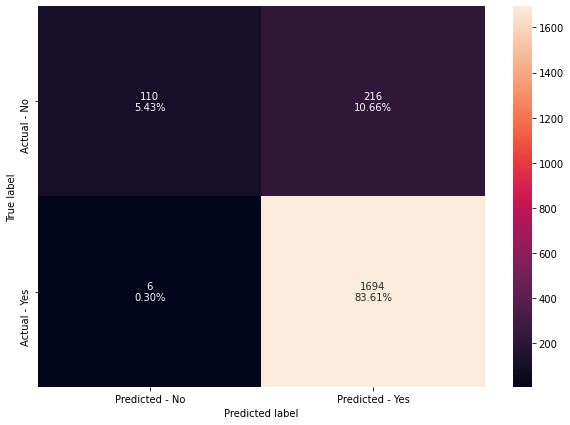

In [174]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_val,X_val)

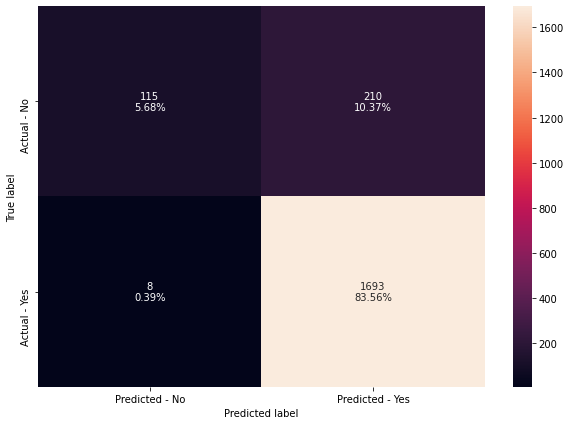

In [175]:
# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test,X_test)

**Model Insights - XGB Randomsearch with grid search**
1. Recall across train, test and validatio around 99.5 to 99.7%
2. Accuracy and Precision are more close for all three datasets. 

In [176]:
# defining list of models
models = [rf_tuned1, rf_tuned2, xgb_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_val = []
acc_test = []

recall_train = []
recall_val = []
recall_test = []
precision_train = []
precision_val = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_val.append(j[1])
    acc_test.append(j[2])
    recall_train.append(j[3])
    recall_val.append(j[4])
    recall_test.append(j[5])
    precision_train.append(j[6])
    precision_val.append(j[7])
    precision_test.append(j[8])

In [177]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "Random Forest with GridSearchCV",
            "Random Forest with RandomizedSearchCV",
            "XGBoost with RandomizedSearchCV then GridSearchCV",
    
        ],
        "Train_Accuracy": acc_train,
        "Validation_Accuracy":acc_val,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Validation_Recall": recall_val,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Validation_Precision": precision_val,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

,Model,Train_Accuracy,Validation_Accuracy,Test_Accuracy,Train_Recall,Validation_Recall,Test_Recall,Train_Precision,Validation_Precision,Test_Precision
2,XGBoost with RandomizedSearchCV then GridSearchCV,0.897119,0.890424,0.892399,0.997843,0.996471,0.995297,0.892318,0.886911,0.889648
1,Random Forest with RandomizedSearchCV,0.994509,0.989412,0.988830,0.994509,0.989412,0.988830,0.962057,0.938616,0.944413
0,Random Forest with GridSearchCV,0.962305,0.937315,0.942251,0.994705,0.989412,0.988242,0.961699,0.939140,0.945444


# **Model Performance Comparison**

1. we build Random foreset and XG boost with the combination of grid Search CV and RandomSearch. 
2. RandomForest with Random search looks little over fit on train data. 
3. RandomForest with Grid search not great consistent among train test and validation dataset. 
4. Overall XG boost is close to right fit for train , test and validation dataset. 
5. Recall for XG boost is range og 99.5 to 99.7 % across all dataset

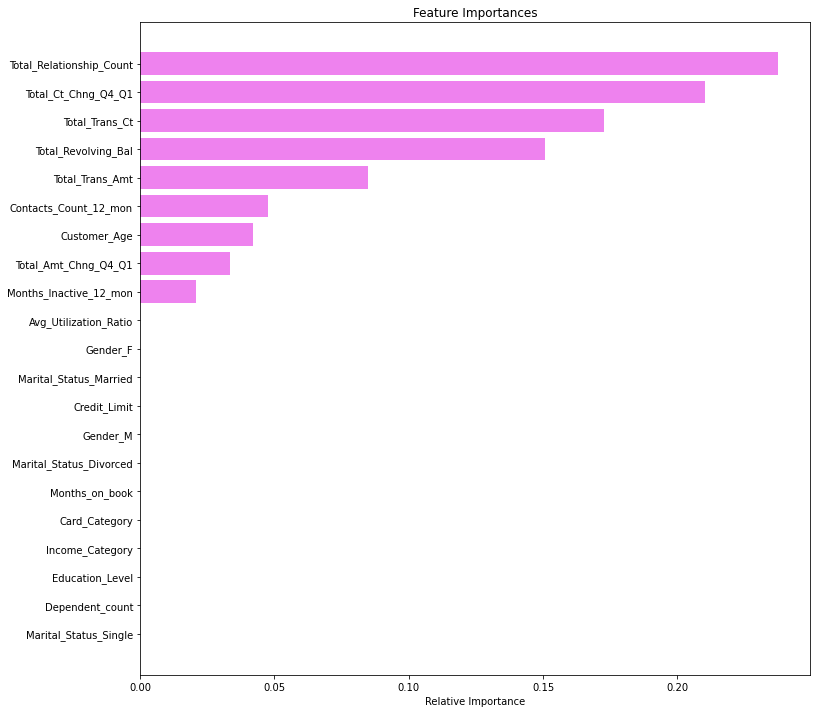

In [178]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

<a id = Final> Actionable Insights & Recommendations</a>

**Actionable Insights & Recommendations**
1. Total_Relationship_Count - the most important feature to avoid attrition - Dictates when count increases - possibilities of attrition decreases. This was evident in data exploration too.
2. Total_trans_ct_Q4_Q1 and Total_trans_ct - both looks close enough forms the second most important Feature - when customer count decreases possibility of attrition increases. 
3. Total_Revol_balance - When customer uses very low or high - risk of attrition are there - exploratory analysis gave an insight on this. 
4. Total_transaction_amount - the customer retention is more when they use spend average category. 
5. customer Age - when customer age increases, the attraction to credit card decreases which causes attrition. 
6. No_of_contact_last_12_Month - unhappy customer contact many times before attrition. 
7. Blue card holders has more attrition - from data exploratory insights. 

**Recommendation** 
1. Engaging customer to increase more relation ship, providing complimantory premium card with offers.
2. Encouraging customer for more swipping to increase the transaction count. 
3. Providing less interest for more aged customers to retain elder customer. 
4. Encouraging customer to make auto payment on rent, utilities etc so total revol balance kept in average, thereby decreasing attrition chances. 
5. providing upgrading the cards from blue to gold, gold to platinum etc - There by customers can use old and upgraded cards, inturn increases in relationship. 